In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import re
import pandas as pd
from bs4 import BeautifulSoup
import math
from unicodedata import normalize
import json

<h2>Please run the below cell and toggle it on</h2>

In [2]:
#script to toggle a warning from jupyter that was on after changing the data type of the date from object to datetime
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [3]:
dfCrime2001=pd.read_csv("Crimes_-_2001_to_Present.csv")
dfCrime2001.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [4]:
dfCrime2001

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7511209,12650654,JF182721,03/21/2022 02:00:00 AM,111XX S VINCENNES AVE,0320,ROBBERY,STRONG ARM - NO WEAPON,STREET,False,False,...,19.0,75.0,03,1167204.0,1831042.0,2022,03/28/2022 04:49:40 PM,41.691929,-87.663468,"(41.691928694, -87.663468026)"
7511210,12649919,JF182919,03/21/2022 12:14:00 AM,0000X W 126TH PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,9.0,53.0,26,1178198.0,1821101.0,2022,03/28/2022 04:49:40 PM,41.664407,-87.623517,"(41.664407422, -87.623517464)"
7511211,12649166,JF182097,03/21/2022 11:00:00 PM,009XX E 50TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,...,4.0,39.0,08B,1183363.0,1872056.0,2022,03/28/2022 04:49:40 PM,41.804115,-87.603034,"(41.804115406, -87.603033659)"
7511212,12648894,JF181828,03/21/2022 02:54:00 PM,057XX S MARYLAND AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,VEHICLE NON-COMMERCIAL,True,False,...,5.0,41.0,15,1182884.0,1867234.0,2022,03/28/2022 04:49:40 PM,41.790895,-87.604940,"(41.790894592, -87.604940233)"


In [5]:
dfCrime2001.isnull().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      9118
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614843
Community Area          613478
FBI Code                     0
X Coordinate             78262
Y Coordinate             78262
Year                         0
Updated On                   0
Latitude                 78262
Longitude                78262
Location                 78262
dtype: int64

In [6]:
dfCrimeClean=dfCrime2001.dropna()

In [7]:
dfCrimeClean

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,HY411435,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7511209,12650654,JF182721,03/21/2022 02:00:00 AM,111XX S VINCENNES AVE,0320,ROBBERY,STRONG ARM - NO WEAPON,STREET,False,False,...,19.0,75.0,03,1167204.0,1831042.0,2022,03/28/2022 04:49:40 PM,41.691929,-87.663468,"(41.691928694, -87.663468026)"
7511210,12649919,JF182919,03/21/2022 12:14:00 AM,0000X W 126TH PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,9.0,53.0,26,1178198.0,1821101.0,2022,03/28/2022 04:49:40 PM,41.664407,-87.623517,"(41.664407422, -87.623517464)"
7511211,12649166,JF182097,03/21/2022 11:00:00 PM,009XX E 50TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,...,4.0,39.0,08B,1183363.0,1872056.0,2022,03/28/2022 04:49:40 PM,41.804115,-87.603034,"(41.804115406, -87.603033659)"
7511212,12648894,JF181828,03/21/2022 02:54:00 PM,057XX S MARYLAND AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,VEHICLE NON-COMMERCIAL,True,False,...,5.0,41.0,15,1182884.0,1867234.0,2022,03/28/2022 04:49:40 PM,41.790895,-87.604940,"(41.790894592, -87.604940233)"


In [8]:
dfCrimeClean.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [9]:
dfSoceco=pd.read_csv("Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv")
dfSoceco

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0


In [10]:
dfSoceco.isnull().sum()

Community Area Number                           1
COMMUNITY AREA NAME                             0
PERCENT OF HOUSING CROWDED                      0
PERCENT HOUSEHOLDS BELOW POVERTY                0
PERCENT AGED 16+ UNEMPLOYED                     0
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    0
PERCENT AGED UNDER 18 OR OVER 64                0
PER CAPITA INCOME                               0
HARDSHIP INDEX                                  1
dtype: int64

In [11]:
dfSocecoClean=dfSoceco.dropna()

In [12]:
dfSocecoClean

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...
72,73.0,Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0


In [13]:
dfSocecoClean.isnull().sum()

Community Area Number                           0
COMMUNITY AREA NAME                             0
PERCENT OF HOUSING CROWDED                      0
PERCENT HOUSEHOLDS BELOW POVERTY                0
PERCENT AGED 16+ UNEMPLOYED                     0
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    0
PERCENT AGED UNDER 18 OR OVER 64                0
PER CAPITA INCOME                               0
HARDSHIP INDEX                                  0
dtype: int64

In [14]:
dfFBI=pd.read_excel("table_1_crime_in_the_united_states_by_volume_and_rate_per_100000_inhabitants_1994-2013(1).xls")
dfFBI

,Year,Population,Violents crime,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (legacy definition),Rape (legacy definition) rate,Robbery,Robbery rate,...,Burglary,Burglary rate,Larceny and theft,Larceny and theft rate,Motor vehicle theft,Motor vehicle theft rate,Unnamed: 20,,Unnamed: 22,Unnamed: 23
0,1994,260327021,1857670,713.6,23326,9.0,102216,39.3,618949,237.8,...,2712774,1042.1,7879812,3026.9,1539287,591.3,NaN,NaN,NaN,NaN
1,1995,262803276,1798792,684.5,21606,8.2,97470,37.1,580509,220.9,...,2593784,987.0,7997710,3043.2,1472441,560.3,NaN,NaN,NaN,NaN
2,1996,265228572,1688540,636.6,19645,7.4,96252,36.3,535594,201.9,...,2506400,945.0,7904685,2980.3,1394238,525.7,NaN,NaN,NaN,NaN
3,1997,267783607,1636096,611.0,18208,6.8,96153,35.9,498534,186.2,...,2460526,918.8,7743760,2891.8,1354189,505.7,NaN,NaN,NaN,NaN
4,1998,270248003,1533887,567.6,16974,6.3,93144,34.5,447186,165.5,...,2332735,863.2,7376311,2729.5,1242781,459.9,,NaN,NaN,NaN
5,1999,272690813,1426044,523.0,15522,5.7,89411,32.8,409371,150.1,...,2100739,770.4,6955520,2550.7,1152075,422.5,NaN,NaN,NaN,NaN
6,2000,281421906,1425486,506.5,15586,5.5,90178,32.0,408016,145.0,...,2050992,728.8,6971590,2477.3,1160002,412.2,NaN,NaN,NaN,
7,2001,285317559,1439480,504.5,16037,5.6,90863,31.8,423557,148.5,...,2116531,741.8,7092267,2485.7,1228391,430.5,NaN,NaN,NaN,NaN
8,2002,287973924,1423677,494.4,16229,5.6,95235,33.1,420806,146.1,...,2151252,747.0,7057379,2450.7,1246646,432.9,NaN,NaN,NaN,NaN
9,2003,290788976,1383676,475.8,16528,5.7,93883,32.3,414235,142.5,...,2154834,741.0,7026802,2416.5,1261226,433.7,,NaN,NaN,NaN


In [15]:
dfFBI=dfFBI.drop(' ',axis=1)

In [16]:
dfFBI=dfFBI.drop(['Unnamed: 20', 'Unnamed: 22', 'Unnamed: 23'], axis=1)

In [17]:
dfFBI

,Year,Population,Violents crime,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (legacy definition),Rape (legacy definition) rate,Robbery,Robbery rate,Aggravated assault,Aggravated assault rate,Property crime,Property crime rate,Burglary,Burglary rate,Larceny and theft,Larceny and theft rate,Motor vehicle theft,Motor vehicle theft rate
0,1994,260327021,1857670,713.6,23326,9.0,102216,39.3,618949,237.8,1113179,427.6,12131873,4660.2,2712774,1042.1,7879812,3026.9,1539287,591.3
1,1995,262803276,1798792,684.5,21606,8.2,97470,37.1,580509,220.9,1099207,418.3,12063935,4590.5,2593784,987.0,7997710,3043.2,1472441,560.3
2,1996,265228572,1688540,636.6,19645,7.4,96252,36.3,535594,201.9,1037049,391.0,11805323,4451.0,2506400,945.0,7904685,2980.3,1394238,525.7
3,1997,267783607,1636096,611.0,18208,6.8,96153,35.9,498534,186.2,1023201,382.1,11558475,4316.3,2460526,918.8,7743760,2891.8,1354189,505.7
4,1998,270248003,1533887,567.6,16974,6.3,93144,34.5,447186,165.5,976583,361.4,10951827,4052.5,2332735,863.2,7376311,2729.5,1242781,459.9
5,1999,272690813,1426044,523.0,15522,5.7,89411,32.8,409371,150.1,911740,334.3,10208334,3743.6,2100739,770.4,6955520,2550.7,1152075,422.5
6,2000,281421906,1425486,506.5,15586,5.5,90178,32.0,408016,145.0,911706,324.0,10182584,3618.3,2050992,728.8,6971590,2477.3,1160002,412.2
7,2001,285317559,1439480,504.5,16037,5.6,90863,31.8,423557,148.5,909023,318.6,10437189,3658.1,2116531,741.8,7092267,2485.7,1228391,430.5
8,2002,287973924,1423677,494.4,16229,5.6,95235,33.1,420806,146.1,891407,309.5,10455277,3630.6,2151252,747.0,7057379,2450.7,1246646,432.9
9,2003,290788976,1383676,475.8,16528,5.7,93883,32.3,414235,142.5,859030,295.4,10442862,3591.2,2154834,741.0,7026802,2416.5,1261226,433.7


In [18]:
#used to extract the specific columns from the original data frame that are used in the question.
dfQ1=dfFBI.loc[:, ['Year', 'Population', 'Violent crime rate', 'Murder and nonnegligent manslaughter rate', 'Rape (legacy definition) rate', 'Robbery rate', 'Aggravated assault rate','Property crime rate', 'Burglary rate', 'Larceny and theft rate', 'Motor vehicle theft rate']]
dfQ1

,Year,Population,Violent crime rate,Murder and nonnegligent manslaughter rate,Rape (legacy definition) rate,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny and theft rate,Motor vehicle theft rate
0,1994,260327021,713.6,9.0,39.3,237.8,427.6,4660.2,1042.1,3026.9,591.3
1,1995,262803276,684.5,8.2,37.1,220.9,418.3,4590.5,987.0,3043.2,560.3
2,1996,265228572,636.6,7.4,36.3,201.9,391.0,4451.0,945.0,2980.3,525.7
3,1997,267783607,611.0,6.8,35.9,186.2,382.1,4316.3,918.8,2891.8,505.7
4,1998,270248003,567.6,6.3,34.5,165.5,361.4,4052.5,863.2,2729.5,459.9
5,1999,272690813,523.0,5.7,32.8,150.1,334.3,3743.6,770.4,2550.7,422.5
6,2000,281421906,506.5,5.5,32.0,145.0,324.0,3618.3,728.8,2477.3,412.2
7,2001,285317559,504.5,5.6,31.8,148.5,318.6,3658.1,741.8,2485.7,430.5
8,2002,287973924,494.4,5.6,33.1,146.1,309.5,3630.6,747.0,2450.7,432.9
9,2003,290788976,475.8,5.7,32.3,142.5,295.4,3591.2,741.0,2416.5,433.7


In [19]:
#used to extract the specific columns from the original data frame that are used in the question.
dfQ2=dfCrimeClean.loc[:, ['ID', 'Date', 'Year', 'Primary Type']]
dfQ2

,ID,Date,Year,Primary Type
0,10224738,09/05/2015 01:30:00 PM,2015,BATTERY
1,10224739,09/04/2015 11:30:00 AM,2015,THEFT
3,10224740,09/05/2015 12:45:00 PM,2015,NARCOTICS
4,10224741,09/05/2015 01:00:00 PM,2015,ASSAULT
5,10224742,09/05/2015 10:55:00 AM,2015,BURGLARY
...,...,...,...,...
7511209,12650654,03/21/2022 02:00:00 AM,2022,ROBBERY
7511210,12649919,03/21/2022 12:14:00 AM,2022,OTHER OFFENSE
7511211,12649166,03/21/2022 11:00:00 PM,2022,BATTERY
7511212,12648894,03/21/2022 02:54:00 PM,2022,WEAPONS VIOLATION


In [20]:
#used to extract the specific columns from the original data frame that are used in the question.
dfQ3=dfCrimeClean.loc[:, ['ID', 'Date', 'Primary Type', 'District', 'Arrest', 'Location Description']]
dfQ3

,ID,Date,Primary Type,District,Arrest,Location Description
0,10224738,09/05/2015 01:30:00 PM,BATTERY,9.0,False,RESIDENCE
1,10224739,09/04/2015 11:30:00 AM,THEFT,15.0,False,CTA BUS
3,10224740,09/05/2015 12:45:00 PM,NARCOTICS,14.0,True,SIDEWALK
4,10224741,09/05/2015 01:00:00 PM,ASSAULT,15.0,False,APARTMENT
5,10224742,09/05/2015 10:55:00 AM,BURGLARY,6.0,False,RESIDENCE
...,...,...,...,...,...,...
7511209,12650654,03/21/2022 02:00:00 AM,ROBBERY,22.0,False,STREET
7511210,12649919,03/21/2022 12:14:00 AM,OTHER OFFENSE,5.0,False,RESIDENCE
7511211,12649166,03/21/2022 11:00:00 PM,BATTERY,2.0,True,RESIDENCE
7511212,12648894,03/21/2022 02:54:00 PM,WEAPONS VIOLATION,2.0,True,VEHICLE NON-COMMERCIAL


In [21]:
dfQ3.dtypes

ID                        int64
Date                     object
Primary Type             object
District                float64
Arrest                     bool
Location Description     object
dtype: object

In [22]:
#converts District data type from float to int
dfQ3["District"]=dfQ3["District"].astype(int)

In [23]:
dfQ3.dtypes

ID                       int64
Date                    object
Primary Type            object
District                 int32
Arrest                    bool
Location Description    object
dtype: object

In [24]:
dfQ3

,ID,Date,Primary Type,District,Arrest,Location Description
0,10224738,09/05/2015 01:30:00 PM,BATTERY,9,False,RESIDENCE
1,10224739,09/04/2015 11:30:00 AM,THEFT,15,False,CTA BUS
3,10224740,09/05/2015 12:45:00 PM,NARCOTICS,14,True,SIDEWALK
4,10224741,09/05/2015 01:00:00 PM,ASSAULT,15,False,APARTMENT
5,10224742,09/05/2015 10:55:00 AM,BURGLARY,6,False,RESIDENCE
...,...,...,...,...,...,...
7511209,12650654,03/21/2022 02:00:00 AM,ROBBERY,22,False,STREET
7511210,12649919,03/21/2022 12:14:00 AM,OTHER OFFENSE,5,False,RESIDENCE
7511211,12649166,03/21/2022 11:00:00 PM,BATTERY,2,True,RESIDENCE
7511212,12648894,03/21/2022 02:54:00 PM,WEAPONS VIOLATION,2,True,VEHICLE NON-COMMERCIAL


In [25]:
#used to extract the specific columns from the original data frame that are used in the question.
dfQ5=dfSocecoClean.loc[:, ['Community Area Number', 'COMMUNITY AREA NAME', 'PERCENT OF HOUSING CROWDED', 'PERCENT AGED 16+ UNEMPLOYED', 'PER CAPITA INCOME ']]
dfQ5

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT AGED 16+ UNEMPLOYED,PER CAPITA INCOME
0,1.0,Rogers Park,7.7,8.7,23939
1,2.0,West Ridge,7.8,8.8,23040
2,3.0,Uptown,3.8,8.9,35787
3,4.0,Lincoln Square,3.4,8.2,37524
4,5.0,North Center,0.3,5.2,57123
...,...,...,...,...,...
72,73.0,Washington Height,1.1,20.8,19713
73,74.0,Mount Greenwood,1.0,8.7,34381
74,75.0,Morgan Park,0.8,15.0,27149
75,76.0,O'Hare,3.6,7.1,25828


In [26]:
dfQ5["Community Area Number"]=dfQ5["Community Area Number"].astype(int)
dfQ5

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT AGED 16+ UNEMPLOYED,PER CAPITA INCOME
0,1,Rogers Park,7.7,8.7,23939
1,2,West Ridge,7.8,8.8,23040
2,3,Uptown,3.8,8.9,35787
3,4,Lincoln Square,3.4,8.2,37524
4,5,North Center,0.3,5.2,57123
...,...,...,...,...,...
72,73,Washington Height,1.1,20.8,19713
73,74,Mount Greenwood,1.0,8.7,34381
74,75,Morgan Park,0.8,15.0,27149
75,76,O'Hare,3.6,7.1,25828


<h1>Question One</h1> <h4>(Made by Abdelrahman, Adam, Mohamed)</h4>

<h3>1-	What is the rate of change of crimes with respect to the population and the year?</h3>

<h3>We are looking into the rate of certain crimes in a year, link it with the population, and see if there is any correlation between the higher population, year and the crime rate.</h3>

<h3>We created two Line Plot charts. One presents The Crime Rate relation with the year, the other chart presents the Crime Rate relation with the population</h3>

<br>

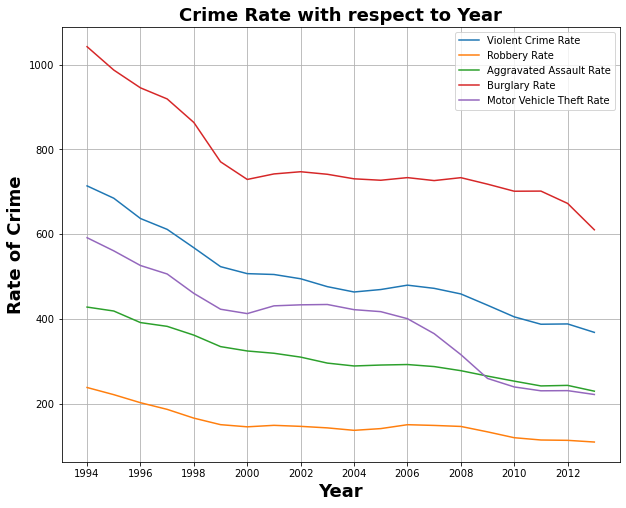

In [27]:
from matplotlib import rcParams
#this function to adjust the chart size.
rcParams['figure.figsize']=10, 8

#function to create a title to the chart.
plt.title('Crime Rate with respect to Year', fontdict={'fontweight':'bold', 'fontsize':18})

#function adds a line to the chart which represents the data.
plt.plot(dfQ1.Year, dfQ1['Violent crime rate'], label='Violent Crime Rate')
plt.plot(dfQ1.Year, dfQ1['Robbery rate'], label='Robbery Rate')
plt.plot(dfQ1.Year, dfQ1['Aggravated assault rate'], label='Aggravated Assault Rate')
plt.plot(dfQ1.Year, dfQ1['Burglary rate'], label='Burglary Rate')
plt.plot(dfQ1.Year, dfQ1['Motor vehicle theft rate'], label='Motor Vehicle Theft Rate')

#this function adds squares to the chart background.
plt.grid(True)
#function presents every two years on the x-axis.
plt.xticks(dfQ1.Year[::2])
#functions labels the x and y axis.
plt.xlabel('Year', fontdict={'fontweight':'bold', 'fontsize':18})
plt.ylabel('Rate of Crime', fontdict={'fontweight':'bold', 'fontsize':18})

#function for the place of the legend.
plt.legend(loc=1);

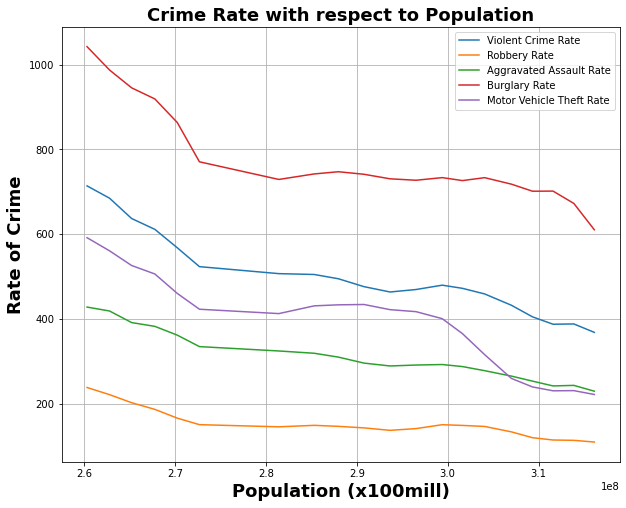

In [28]:
from matplotlib import rcParams
rcParams['figure.figsize']=10, 8

plt.title('Crime Rate with respect to Population', fontdict={'fontweight':'bold', 'fontsize':18})

plt.plot(dfQ1.Population, dfQ1['Violent crime rate'], label='Violent Crime Rate')
plt.plot(dfQ1.Population, dfQ1['Robbery rate'], label='Robbery Rate')
plt.plot(dfQ1.Population, dfQ1['Aggravated assault rate'], label='Aggravated Assault Rate')
plt.plot(dfQ1.Population, dfQ1['Burglary rate'], label='Burglary Rate')
plt.plot(dfQ1.Population, dfQ1['Motor vehicle theft rate'], label='Motor Vehicle Theft Rate')

plt.grid(True)

plt.xlabel('Population (x100mill)', fontdict={'fontweight':'bold', 'fontsize':18})
plt.ylabel('Rate of Crime', fontdict={'fontweight':'bold', 'fontsize':18})

plt.legend(loc=1);

<br>
<br>
<h4>Analysis</h4>

<br>
<h5>According to the two previous line plot graphs, there is a noticable drop in the rate of all the crimes in years from 1994 to 2000 and population of 260 million to 270 million.
While the crimes did not really drop in the years from 2000 to 2008 and population of 270 million to 300 million, except for Motor Vehicle Theft Rate, which in fact rose in the years from 2000 to 2004 with the increase of vehicles. After the year 2010 crime rates began to drop.
<br><br>
With years passing by and population rising, crime rates eventually became lower.
</h5>

<br>
<br>

<h1>Question Two<h1> <h4>(Made by Abdelrahman, Adam, Mohamed)</h4>

<h3>2-	What is the crime peak times and dates and does the holidays affect the crime rate?</h3>

<h3>We are going to discover if holidays contribute to the increase or decrease of crime rate, and we are going to find out by checking the dates of the holidays and regular days and compare the crime rate in both.</h3>

<h3>We created a Scatter Plot and a Line Plot. They both present the same graph, the graph represents the Date and the frequency of that certain date.</h3>

<br>

In [29]:
#checking the data frame column type
dfQ2.dtypes

ID               int64
Date            object
Year             int64
Primary Type    object
dtype: object

In [30]:
#filtering the data frame so that only the years after 2017 are represented
dfQ2post2017=dfQ2[dfQ2['Year']>2017]
dfQ2post2017

,ID,Date,Year,Primary Type
90,12014684,03/17/2020 09:30:00 PM,2020,THEFT
183,11864018,09/24/2019 08:00:00 AM,2019,DECEPTIVE PRACTICE
235,11859805,10/13/2019 08:30:00 PM,2019,THEFT
420,12012127,03/18/2020 02:03:00 AM,2020,MOTOR VEHICLE THEFT
446,11863808,10/05/2019 06:30:00 PM,2019,THEFT
...,...,...,...,...
7511209,12650654,03/21/2022 02:00:00 AM,2022,ROBBERY
7511210,12649919,03/21/2022 12:14:00 AM,2022,OTHER OFFENSE
7511211,12649166,03/21/2022 11:00:00 PM,2022,BATTERY
7511212,12648894,03/21/2022 02:54:00 PM,2022,WEAPONS VIOLATION


In [31]:
#changing the Date data type from object to datetime
dfQ2post2017['Date']=pd.to_datetime(dfQ2post2017['Date'])
dfQ2post2017
dfQ2post2017.dtypes

C:\Users\abdel\AppData\Local\Temp/ipykernel_22132/1779563242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfQ2post2017['Date']=pd.to_datetime(dfQ2post2017['Date'])


ID                       int64
Date            datetime64[ns]
Year                     int64
Primary Type            object
dtype: object

In [32]:
dfQ2post2017

,ID,Date,Year,Primary Type
90,12014684,2020-03-17 21:30:00,2020,THEFT
183,11864018,2019-09-24 08:00:00,2019,DECEPTIVE PRACTICE
235,11859805,2019-10-13 20:30:00,2019,THEFT
420,12012127,2020-03-18 02:03:00,2020,MOTOR VEHICLE THEFT
446,11863808,2019-10-05 18:30:00,2019,THEFT
...,...,...,...,...
7511209,12650654,2022-03-21 02:00:00,2022,ROBBERY
7511210,12649919,2022-03-21 00:14:00,2022,OTHER OFFENSE
7511211,12649166,2022-03-21 23:00:00,2022,BATTERY
7511212,12648894,2022-03-21 14:54:00,2022,WEAPONS VIOLATION


In [33]:
#splitting the Dates from the Time for easier group by for later
dfQ2post2017['Dates'] = pd.to_datetime(dfQ2post2017['Date']).dt.date
dfQ2post2017['Time'] = pd.to_datetime(dfQ2post2017['Date']).dt.time

C:\Users\abdel\AppData\Local\Temp/ipykernel_22132/2992420397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfQ2post2017['Dates'] = pd.to_datetime(dfQ2post2017['Date']).dt.date
C:\Users\abdel\AppData\Local\Temp/ipykernel_22132/2992420397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfQ2post2017['Time'] = pd.to_datetime(dfQ2post2017['Date']).dt.time


In [34]:
dfQ2post2017

,ID,Date,Year,Primary Type,Dates,Time
90,12014684,2020-03-17 21:30:00,2020,THEFT,2020-03-17,21:30:00
183,11864018,2019-09-24 08:00:00,2019,DECEPTIVE PRACTICE,2019-09-24,08:00:00
235,11859805,2019-10-13 20:30:00,2019,THEFT,2019-10-13,20:30:00
420,12012127,2020-03-18 02:03:00,2020,MOTOR VEHICLE THEFT,2020-03-18,02:03:00
446,11863808,2019-10-05 18:30:00,2019,THEFT,2019-10-05,18:30:00
...,...,...,...,...,...,...
7511209,12650654,2022-03-21 02:00:00,2022,ROBBERY,2022-03-21,02:00:00
7511210,12649919,2022-03-21 00:14:00,2022,OTHER OFFENSE,2022-03-21,00:14:00
7511211,12649166,2022-03-21 23:00:00,2022,BATTERY,2022-03-21,23:00:00
7511212,12648894,2022-03-21 14:54:00,2022,WEAPONS VIOLATION,2022-03-21,14:54:00


In [35]:
dfQ2post2017.dtypes

ID                       int64
Date            datetime64[ns]
Year                     int64
Primary Type            object
Dates                   object
Time                    object
dtype: object

In [36]:
dfQ2post2017['Dates']=pd.to_datetime(dfQ2post2017['Dates'])
dfQ2post2017
dfQ2post2017.dtypes

C:\Users\abdel\AppData\Local\Temp/ipykernel_22132/2248293962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfQ2post2017['Dates']=pd.to_datetime(dfQ2post2017['Dates'])


ID                       int64
Date            datetime64[ns]
Year                     int64
Primary Type            object
Dates           datetime64[ns]
Time                    object
dtype: object

In [37]:
dfQ2Date=dfQ2post2017.groupby(['Dates'])

In [38]:
#counting how frequent the date is in the data frame
dfQ2Final=dfQ2Date.count()

In [39]:
dfQ2Final

,ID,Date,Year,Primary Type,Time
Dates,,,,,
2018-01-01,832,832,832,832,832
2018-01-02,546,546,546,546,546
2018-01-03,559,559,559,559,559
2018-01-04,595,595,595,595,595
2018-01-05,660,660,660,660,660
...,...,...,...,...,...
2022-03-17,532,532,532,532,532
2022-03-18,520,520,520,520,520
2022-03-19,553,553,553,553,553


In [40]:
#replacing the Date from index to a normal column
dfQ2Final.reset_index(inplace=True)
dfQ2Final

,Dates,ID,Date,Year,Primary Type,Time
0,2018-01-01,832,832,832,832,832
1,2018-01-02,546,546,546,546,546
2,2018-01-03,559,559,559,559,559
3,2018-01-04,595,595,595,595,595
4,2018-01-05,660,660,660,660,660
...,...,...,...,...,...,...
1536,2022-03-17,532,532,532,532,532
1537,2022-03-18,520,520,520,520,520
1538,2022-03-19,553,553,553,553,553
1539,2022-03-20,591,591,591,591,591


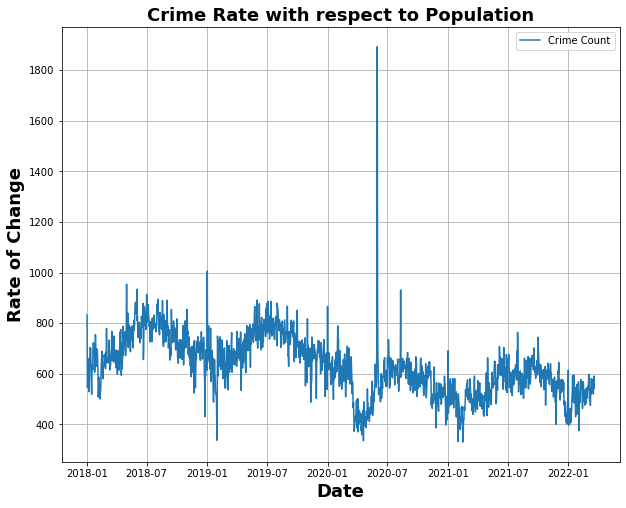

In [41]:
from matplotlib import rcParams
rcParams['figure.figsize']=10, 8

plt.title('Crime Rate with respect to Population', fontdict={'fontweight':'bold', 'fontsize':18})

plt.plot(dfQ2Final.Dates, dfQ2Final['ID'], label='Crime Count')

plt.grid(True)

plt.xlabel('Date', fontdict={'fontweight':'bold', 'fontsize':18})
plt.ylabel('Rate of Change', fontdict={'fontweight':'bold', 'fontsize':18})

plt.legend(loc=1);

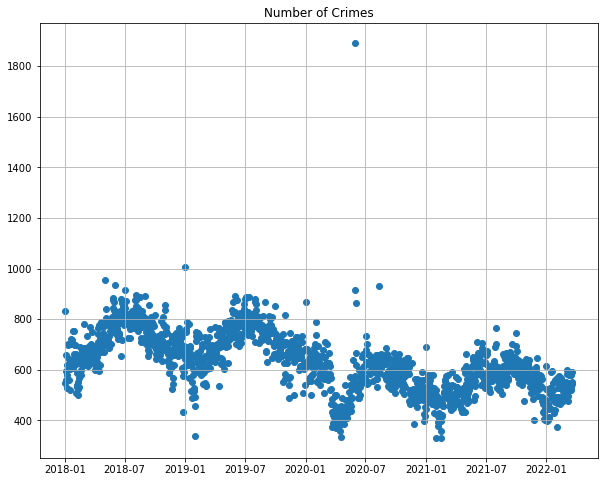

In [42]:
plt.scatter(dfQ2Final.Dates, dfQ2Final.ID)
plt.grid(True)
plt.title("Number of Crimes");

<h3>Analysis</h3>

<h4>There is an obvious peak on the new year's eve, also the average frequency of arrests is increased in the months of the summer vacation (from May to October). There is a huge peak of arrests on May 2020, which is when the black lives matter protests happened. Winter break also has an empact on the arrest rates, as there is a peak trend on february of every year.

<br><br>
Holidays does indeed have a huge impact on the crime rates.</h4>

<br><br>
<br>
<h1>Question 3</h1> <h4>(Made by Abdelrahman, Adam, Mohamed)</h4>

<h2>3-	Do the districts having a high arrest rate affect the rate of crime in the district?</h2>

<h3>Do high arrest rate districts influence the occurrence of crimes in the district, that can be found out by comparing the crime rate in low arrest rate districts and the crime rate in high arrest rate districts.</h3>

<h3>We created three bar chart graphs. The first graph represents the amount of Arrests made. The second graph represents the ammount of arrests that were found guilty (crimes). The last graph is the ratio between the amount of crimes and the amount of arrests.</h3><br>

In [43]:
true_arrest=sum(dfQ3.Arrest)
true_arrest

1802775

In [44]:
#sum of true arrests
districtTrueArrest=dfQ3.groupby(['District'])['Arrest'].sum()
districtTrueArrest

District
1      76255
2      78097
3      90370
4      89536
5      78211
6     106013
7     114010
8     106206
9      93417
10     94831
11    186865
12     75874
14     53170
15    117012
16     42060
17     40656
18     70198
19     63043
20     26663
21         2
22     47563
24     45421
25    107227
31        75
Name: Arrest, dtype: int64

In [45]:
OverallArrest=dfQ3.Arrest.value_counts()
OverallArrest

False    5017564
True     1802775
Name: Arrest, dtype: int64

In [46]:
districtOverallArrest=dfQ3.groupby(['District'])['Arrest'].count()
districtOverallArrest

District
1     276170
2     308220
3     347309
4     390743
5     305149
6     402607
7     401297
8     462416
9     334491
10    296388
11    442595
12    333003
14    260304
15    295676
16    226648
17    196120
18    302473
19    302099
20    117934
21         4
22    224916
24    204036
25    389568
31       173
Name: Arrest, dtype: int64

In [47]:
districtOverallArrest=pd.DataFrame({'District':[1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,24,25,31],
                  'Arrest':[276170, 308220, 347309, 390743, 305149, 402607, 401297, 462416, 334491, 296388, 442595, 333003, 260304, 295676, 226648, 196120, 302473, 302099, 117934, 4, 224916, 204036, 389568, 173]})

districtOverallArrest

,District,Arrest
0,1,276170
1,2,308220
2,3,347309
3,4,390743
4,5,305149
5,6,402607
6,7,401297
7,8,462416
8,9,334491
9,10,296388


In [48]:
districtTrueArrest=dfQ3.groupby(['District'])['Arrest'].sum()
districtTrueArrest

District
1      76255
2      78097
3      90370
4      89536
5      78211
6     106013
7     114010
8     106206
9      93417
10     94831
11    186865
12     75874
14     53170
15    117012
16     42060
17     40656
18     70198
19     63043
20     26663
21         2
22     47563
24     45421
25    107227
31        75
Name: Arrest, dtype: int64

In [49]:
dfDistrictTrueArrest=pd.DataFrame({'District':[1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,24,25,31],
                  'Arrest':[76255, 78097, 90370, 89536, 78211, 106013, 114010, 106206, 93417, 94831, 186865, 75874, 53170, 117012, 42060, 40656, 70198, 63043, 26663, 2, 47563, 45421, 107227, 75]})

dfDistrictTrueArrest

,District,Arrest
0,1,76255
1,2,78097
2,3,90370
3,4,89536
4,5,78211
5,6,106013
6,7,114010
7,8,106206
8,9,93417
9,10,94831


In [50]:
#the ratio of the crime and arrests
arrestRatio=dfDistrictTrueArrest['Arrest'].div(districtOverallArrest['Arrest'])
arrestRatio

0     0.276116
1     0.253381
2     0.260201
3     0.229143
4     0.256304
5     0.263316
6     0.284104
7     0.229676
8     0.279281
9     0.319956
10    0.422203
11    0.227848
12    0.204261
13    0.395744
14    0.185574
15    0.207302
16    0.232080
17    0.208683
18    0.226084
19    0.500000
20    0.211470
21    0.222613
22    0.275246
23    0.433526
Name: Arrest, dtype: float64

In [51]:
dfarrestRatio=pd.DataFrame({'District':[1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,24,25,31],
                  'Arrest':[0.276116, 0.253381, 0.260201, 0.229143, 0.256304, 0.263316, 0.284104, 0.229676, 0.279281, 0.319956, 0.422203, 0.227848, 0.204261, 0.395744, 0.185574, 0.207302, 0.232080, 0.208683, 0.226084, 0.5, 0.211470, 0.222613, 0.275246, 0.433526]})
dfarrestRatio

,District,Arrest
0,1,0.276116
1,2,0.253381
2,3,0.260201
3,4,0.229143
4,5,0.256304
5,6,0.263316
6,7,0.284104
7,8,0.229676
8,9,0.279281
9,10,0.319956


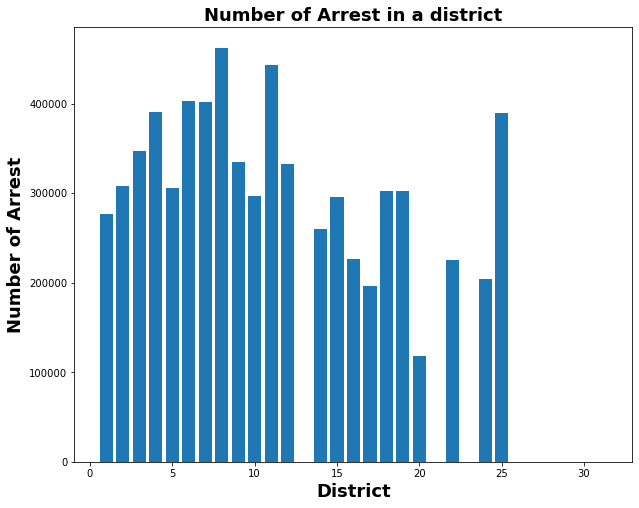

In [52]:
plt.bar(districtOverallArrest['District'], districtOverallArrest['Arrest'])

plt.title('Number of Arrest in a district', fontdict={'fontweight':'bold', 'fontsize':18})
plt.xlabel('District', fontdict={'fontweight':'bold', 'fontsize':18})
plt.ylabel('Number of Arrest', fontdict={'fontweight':'bold', 'fontsize':18})

plt.show();

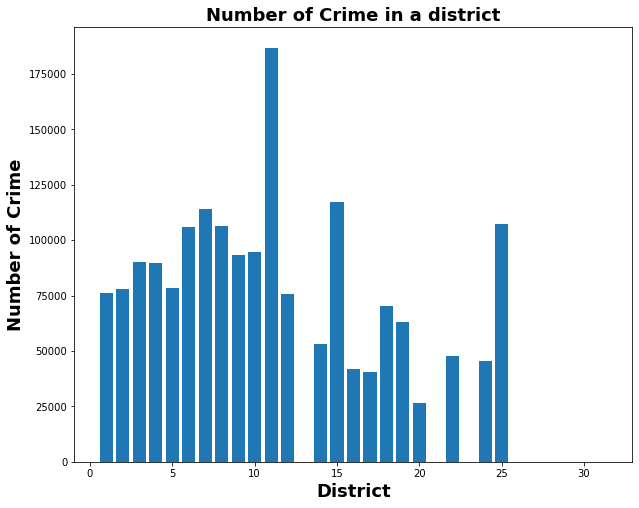

In [53]:
plt.bar(dfDistrictTrueArrest['District'], dfDistrictTrueArrest['Arrest'])

plt.title('Number of Crime in a district', fontdict={'fontweight':'bold', 'fontsize':18})
plt.xlabel('District', fontdict={'fontweight':'bold', 'fontsize':18})
plt.ylabel('Number of Crime', fontdict={'fontweight':'bold', 'fontsize':18}) 
#plt.xticks(ypos)

plt.show();

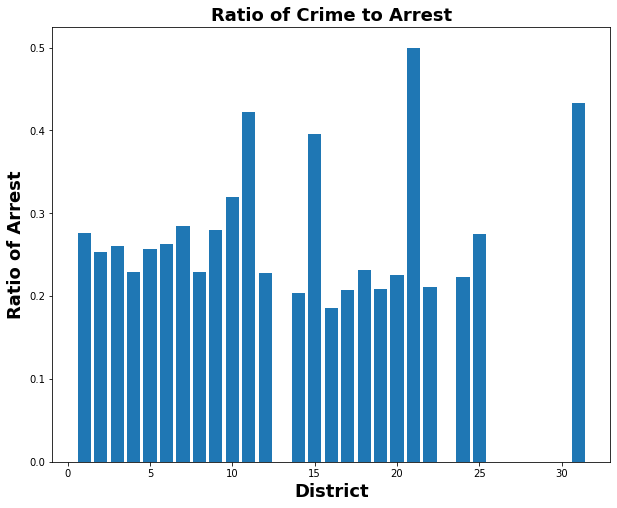

In [54]:
plt.bar(dfarrestRatio['District'], dfarrestRatio['Arrest'])

plt.title('Ratio of Crime to Arrest', fontdict={'fontweight':'bold', 'fontsize':18})
plt.xlabel('District', fontdict={'fontweight':'bold', 'fontsize':18})
plt.ylabel('Ratio of Arrest', fontdict={'fontweight':'bold', 'fontsize':18})
 
plt.show();

<h3>Analysis</h3>

<h4>In District 8, which has the highest number of arrests overall, has lower number of crimes than about 5 other districts. While having one of the lowest crimes to arrest ratio (The lower the better), especially in the first 15 district. On the other hand, district 20 has the lowest number of arrest and the lowest number of crimes, but a fairly low ratio of crimes to arrest which indicates a good police department and a safe neighbourhood with little to no crimes. While there are exceptions like district 11 which has all three of high arrest numbers, high crime number and high crime to arrest ratio. Which may indicate that this district has a high guilt arrest number indicating a good police department as well but a dangerous neighbourhood. 
<br><br>
While there is a trend of having a low arrest rate tend to give a better ratio of crime to arrest, there are some exceptions where a district might have a high arrest rate but a low ratio as in district 8.
<br><br>
Having a high arrest rate does not necessarily affect the rate of crime in the district</h4>

<br><br>
<br>
<h2>Question 5</h2>
<h4>(Made by Abdelrahman, Adam, Mohamed)</h4>

<h2>Do the percentage of housing crowded get affected by the percentage of unemployment and does that affect the per capita income as well?</h2>

<h3>We are going to analyze the percentage of unemployment in an area and link it with the percentage of housing crowded in the same area, looking for a relation between both. Looking in whether this has any effect on the per capita income or not.</h3>

<h3>We created two Line Plot graphs. One that represents both the unemployment and the housing crowded percentage, with respect to the community area number. The other graph represents the per capita income with respect to the community area number.</h3>

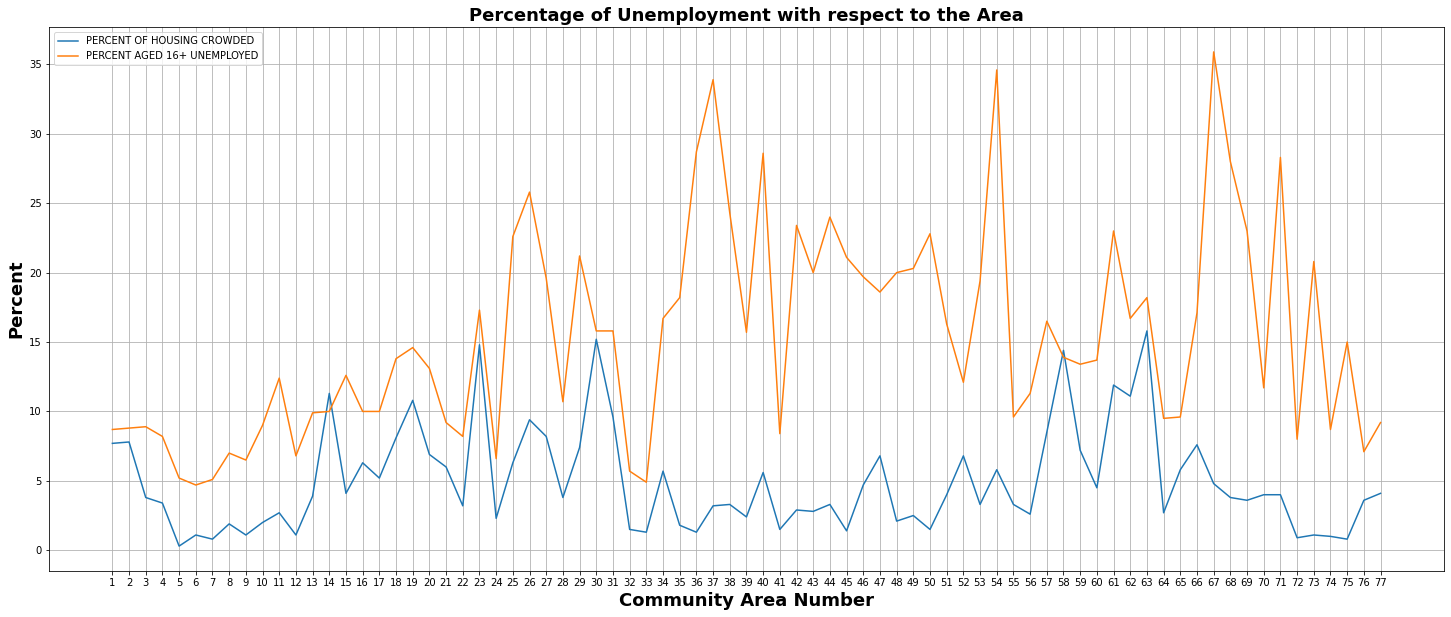

In [55]:
from matplotlib import rcParams
rcParams['figure.figsize']=25, 10

plt.title('Percentage of Unemployment with respect to the Area', fontdict={'fontweight':'bold', 'fontsize':18})

plt.plot(dfQ5['Community Area Number'], dfQ5['PERCENT OF HOUSING CROWDED'], label='PERCENT OF HOUSING CROWDED')
plt.plot(dfQ5['Community Area Number'], dfQ5['PERCENT AGED 16+ UNEMPLOYED'], label='PERCENT AGED 16+ UNEMPLOYED')

plt.grid(True)
plt.xticks(dfQ5['Community Area Number'])
plt.xlabel('Community Area Number', fontdict={'fontweight':'bold', 'fontsize':18})
plt.ylabel('Percent', fontdict={'fontweight':'bold', 'fontsize':18})

plt.legend(loc=2);

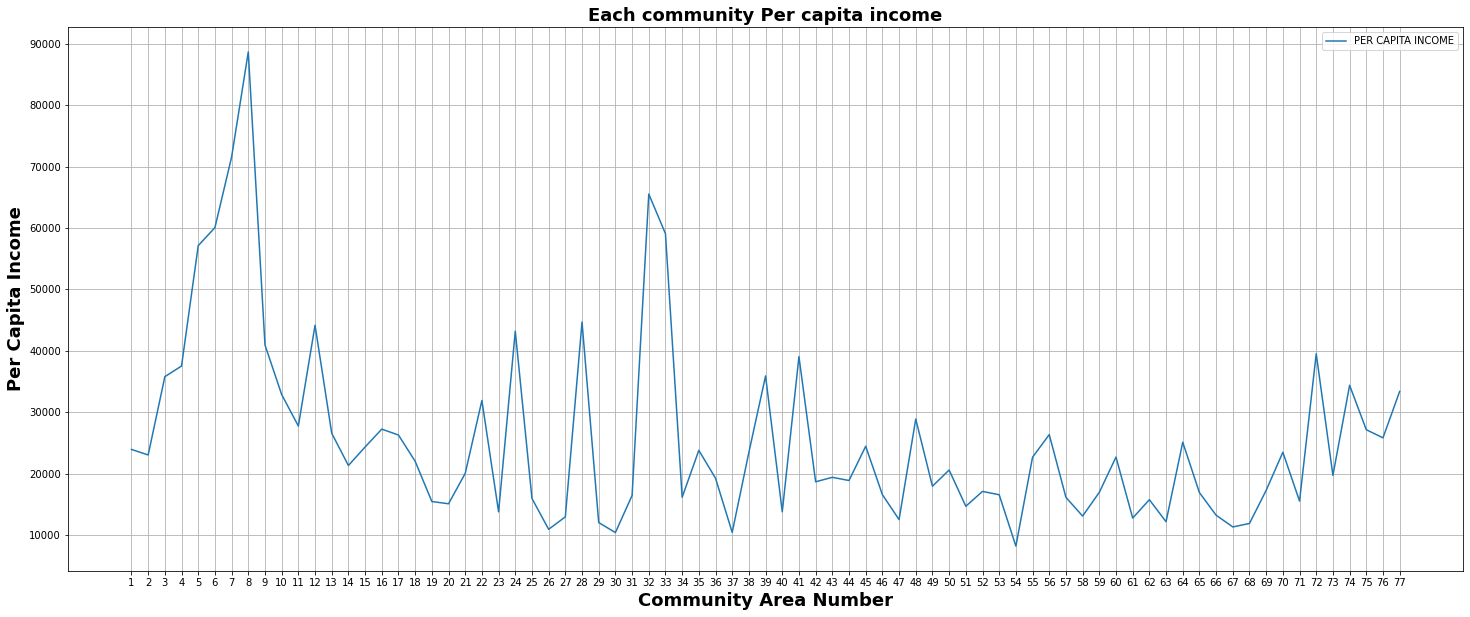

In [56]:
from matplotlib import rcParams
rcParams['figure.figsize']=25, 10

plt.title('Each community Per capita income', fontdict={'fontweight':'bold', 'fontsize':18})

plt.plot(dfQ5['Community Area Number'], dfQ5['PER CAPITA INCOME '], label='PER CAPITA INCOME')

plt.grid(True)
plt.xticks(dfQ5['Community Area Number'])
plt.xlabel('Community Area Number', fontdict={'fontweight':'bold', 'fontsize':18})
plt.ylabel('Per Capita Income', fontdict={'fontweight':'bold', 'fontsize':18})

plt.legend(loc=1);

<h3>Analysis</h3>

<h4>In the first graph both lines of unemployment and housing crowded are nearly identical, in the peaks and the lowest points, with a strange exception of the districts 50, 51, 52, where they have a high unemployment rate and has a decreasing line, but unlike the remaining 77 district, they have a low housing crowded rate but an escalating line, which means that they have an inverse relation.
The second graph indicates that as the unemployment rate is low the per capita income is high, as in district 8, which has the highest per capita income, has a low unemployment and housing crowded rate. While district 54 which has the lowest per capita income has the highest unemployment rate.
<br>
<br>
Percentage of housing crowded gets affected identically as the unemployment, except for the exception of districts 50, 51, and 52. While the per capita income is nearly the exact inverse of the housing crowded and unemployment rates.
</h4>

<br>
<br>
<br>

<br><br>
# Part Two
<br><br>
### Data Scrapping
<br><br>

#### We pass on the html url and read the page

In [69]:
income34

[  Unnamed: 0     2019 1 Year Change 3 Year Change
 0         US  $65,712        +4.21%        +7.05%
 1   Illinois  $69,187        +4.50%        +6.53%
 2    Chicago  $75,379        +4.63%        +7.17%,
     Date       US Illinois  Chicago
 0   2019  $65,712  $69,187  $75,379
 1   2018  $63,059  $66,209  $72,042
 2   2017  $62,927  $65,697  $71,340
 3   2016  $61,383  $64,945  $70,335
 4   2015  $60,187  $64,302  $68,149
 5   2014  $58,001  $62,095  $66,585
 6   2013  $57,437  $61,790  $66,576
 7   2012  $57,307  $61,508  $66,109
 8   2011  $57,531  $60,644  $65,238
 9   2010  $58,809  $62,247  $67,103
 10  2009  $59,988  $64,462  $70,151
 11  2008  $61,932  $66,938  $72,961
 12  2007  $62,717  $66,899  $73,242
 13  2006  $61,586  $66,105  $72,463
 14  2005  $60,684  $65,957  $71,795,
   Unnamed: 0     2019 1 Year Change 3 Year Change
 0         US  $65,712        +6.09%       +14.05%
 1   Illinois  $69,187        +6.39%       +13.50%
 2    Chicago  $75,379        +6.53%       +14.18

In [68]:
url = requests.get('http://www.deptofnumbers.com/income/illinois/chicago/')
income34=pd.read_html(url.text, match='')

In [70]:
print(f'Total tables: {len(income34)}')

Total tables: 12


In [71]:
incomeClean=pd.DataFrame({'Date':['2019','2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008','2007','2006','2005'],
                   'US':[65.712, 63.059, 62.927, 61.383, 60.187, 58.001, 57.437, 57.307, 57.531, 58.809, 59.988, 61.932, 62.717, 61.586, 60.684],
                   'Illinois':[69.187, 66.209, 65.697, 64.945, 64.302, 62.095, 61.790, 61.508, 60.644, 62.247, 64.462, 66.938, 66.899, 66.105, 65.957],
                   'Chicago':[75.379, 72.042, 71.340, 70.335, 68.149, 66.585, 66.576, 66.109, 65.238, 67.103, 70.151, 72.961, 73.242, 72.463, 71.795]})

In [72]:
incomeClean

,Date,US,Illinois,Chicago
0,2019,65.712,69.187,75.379
1,2018,63.059,66.209,72.042
2,2017,62.927,65.697,71.340
3,2016,61.383,64.945,70.335
4,2015,60.187,64.302,68.149
5,2014,58.001,62.095,66.585
6,2013,57.437,61.790,66.576
7,2012,57.307,61.508,66.109
8,2011,57.531,60.644,65.238
9,2010,58.809,62.247,67.103


#### Dropping the US column as it does not contribute to the dataframe

In [73]:
incomeClean=incomeClean.drop('US', axis=1)

In [74]:
incomeClean

,Date,Illinois,Chicago
0,2019,69.187,75.379
1,2018,66.209,72.042
2,2017,65.697,71.340
3,2016,64.945,70.335
4,2015,64.302,68.149
5,2014,62.095,66.585
6,2013,61.790,66.576
7,2012,61.508,66.109
8,2011,60.644,65.238
9,2010,62.247,67.103


<br><br>
### JSON Scrapping
<br><br>

### Scrapping html page by using the json link

In [75]:
url='https://data.cityofchicago.org/api/id/naz8-j4nc.json?$query=select%20*%2C%20%3Aid%20order%20by%20%60lab_report_date%60%20desc%20offset%20100%20limit%20100'
COVIDReport = requests.get(url)

In [76]:
COVIDReport_text = COVIDReport.text
COVIDReport_page = BeautifulSoup(COVIDReport_text,'html.parser')

In [77]:
X= COVIDReport_page.text
site_json=json.loads(X)

In [78]:
site_json

[{'lab_report_date': '2022-01-27T00:00:00.000',
  'cases_total': '1041',
  'deaths_total': '16',
  'hospitalizations_total': '70',
  'cases_age_0_17': '290',
  'cases_age_18_29': '203',
  'cases_age_30_39': '193',
  'cases_age_40_49': '120',
  'cases_age_50_59': '81',
  'cases_age_60_69': '86',
  'cases_age_70_79': '42',
  'cases_age_80_': '25',
  'cases_age_unknown': '1',
  'cases_female': '539',
  'cases_male': '495',
  'cases_unknown_gender': '7',
  'cases_latinx': '265',
  'cases_asian_non_latinx': '60',
  'cases_black_non_latinx': '158',
  'cases_white_non_latinx': '293',
  'cases_other_non_latinx': '64',
  'cases_unknown_race_eth': '201',
  'deaths_0_17_yrs': '0',
  'deaths_18_29_yrs': '0',
  'deaths_30_39_yrs': '0',
  'deaths_40_49_yrs': '0',
  'deaths_50_59_yrs': '0',
  'deaths_60_69_yrs': '2',
  'deaths_70_79_yrs': '6',
  'deaths_80_yrs': '8',
  'deaths_unknown_age': '0',
  'deaths_female': '8',
  'deaths_male': '8',
  'deaths_unknown_gender': '0',
  'deaths_latinx': '4',
  'd

In [79]:
Covid_df= pd.read_json(X)
Covid_df

,lab_report_date,cases_total,deaths_total,hospitalizations_total,cases_age_0_17,cases_age_18_29,cases_age_30_39,cases_age_40_49,cases_age_50_59,cases_age_60_69,...,hospitalizations_female,hospitalizations_male,hospitalizations_unknown_gender,hospitalizations_latinx,hospitalizations_asian_non_latinx,hospitalizations_black_non_latinx,hospitalizations_white_non_latinx,hospitalizations_other_race_non_latinx,hospitalizations_unknown_race_ethnicity,:id
0,2022-01-27T00:00:00.000,1041,16,70,290,203,193,120,81,86,...,35,35,0,17,2,29,20,2,0,row-agsq_8m26.gbi3
1,2022-01-26T00:00:00.000,1233,23,59,346,252,207,158,100,83,...,30,29,0,16,3,13,26,0,1,row-q8es~hp3q-sscd
2,2022-01-25T00:00:00.000,1371,19,71,410,261,227,170,122,107,...,39,32,0,15,1,30,23,0,2,row-g6mt.aiae~i6qf
3,2022-01-24T00:00:00.000,1523,19,83,414,297,254,175,154,119,...,42,41,0,20,4,34,22,0,3,row-ytt4-v34d-m68w
4,2022-01-23T00:00:00.000,675,26,62,166,118,135,101,73,44,...,43,19,0,14,1,30,13,2,2,row-bt8n-yt88~dv7a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-10-24T00:00:00.000,204,4,7,49,41,54,23,16,12,...,3,4,0,1,0,5,1,0,0,row-gc4x_hjkg.2763
96,2021-10-23T00:00:00.000,222,2,19,37,40,58,24,27,21,...,9,10,0,4,0,6,7,1,1,row-2kpz.nf5v.6hxn
97,2021-10-22T00:00:00.000,306,5,17,65,51,79,35,37,23,...,10,7,0,4,0,8,3,2,0,row-9fcu-eqnd~qz6e
98,2021-10-21T00:00:00.000,337,5,23,84,69,71,40,39,19,...,9,14,0,6,2,10,3,1,1,row-sfcj.iqt8~uzvx


<br><br>
### PDF Scrapping
<br><br>

### Scrapping a pdf page, we read the pdf file, and then convert it to an excel file.

In [80]:
Tables = tabula.read_pdf("Chicago Alley Lighting Project.pdf", pages="all")

In [84]:
folder_name = "Tables"
if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
# iterate over extracted tables and export as excel individually
for i, table in enumerate(Tables, start=1):
    table.to_excel(os.path.join(folder_name, f"table_{i}.xlsx"), index=False)

In [85]:
tabula.convert_into("Chicago Alley Lighting Project.pdf", "Lighting.csv", output_format="csv", pages="all")

In [88]:
Light=pd.read_csv("Lighting.csv")
Light

,Crime Type,District 11 Experimental Area,District 7 Control Area
0,Murder,69,55
1,Criminal Sexual Assault,191,188
2,Robbery,1924,1628
3,Assault,2900,3250
4,Burglary,1099,1919
5,Theft,3310,3778
6,Motor Vehicle Theft,1294,1566
7,Arson,68,78


<br><br>
### Cleaning Data
<br><br>

In [80]:
Covid_df.dtypes

lab_report_date                            object
cases_total                                 int64
deaths_total                                int64
hospitalizations_total                      int64
cases_age_0_17                              int64
cases_age_18_29                             int64
cases_age_30_39                             int64
cases_age_40_49                             int64
cases_age_50_59                             int64
cases_age_60_69                             int64
cases_age_70_79                             int64
cases_age_80_                               int64
cases_age_unknown                           int64
cases_female                                int64
cases_male                                  int64
cases_unknown_gender                        int64
cases_latinx                                int64
cases_asian_non_latinx                      int64
cases_black_non_latinx                      int64
cases_white_non_latinx                      int64


#### Converting the date from object to datetime64

In [81]:
Covid_df['lab_report_date']=pd.to_datetime(Covid_df['lab_report_date'])
Covid_df
Covid_df.dtypes

lab_report_date                            datetime64[ns]
cases_total                                         int64
deaths_total                                        int64
hospitalizations_total                              int64
cases_age_0_17                                      int64
cases_age_18_29                                     int64
cases_age_30_39                                     int64
cases_age_40_49                                     int64
cases_age_50_59                                     int64
cases_age_60_69                                     int64
cases_age_70_79                                     int64
cases_age_80_                                       int64
cases_age_unknown                                   int64
cases_female                                        int64
cases_male                                          int64
cases_unknown_gender                                int64
cases_latinx                                        int64
cases_asian_no

In [82]:
Covid_df

,lab_report_date,cases_total,deaths_total,hospitalizations_total,cases_age_0_17,cases_age_18_29,cases_age_30_39,cases_age_40_49,cases_age_50_59,cases_age_60_69,...,hospitalizations_female,hospitalizations_male,hospitalizations_unknown_gender,hospitalizations_latinx,hospitalizations_asian_non_latinx,hospitalizations_black_non_latinx,hospitalizations_white_non_latinx,hospitalizations_other_race_non_latinx,hospitalizations_unknown_race_ethnicity,:id
0,2022-01-27,1041,16,70,290,203,193,120,81,86,...,35,35,0,17,2,29,20,2,0,row-agsq_8m26.gbi3
1,2022-01-26,1233,23,59,346,252,207,158,100,83,...,30,29,0,16,3,13,26,0,1,row-q8es~hp3q-sscd
2,2022-01-25,1371,19,71,410,261,227,170,122,107,...,39,32,0,15,1,30,23,0,2,row-g6mt.aiae~i6qf
3,2022-01-24,1523,19,83,414,297,254,175,154,119,...,42,41,0,20,4,34,22,0,3,row-ytt4-v34d-m68w
4,2022-01-23,675,26,62,166,118,135,101,73,44,...,43,19,0,14,1,30,13,2,2,row-bt8n-yt88~dv7a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-10-24,204,4,7,49,41,54,23,16,12,...,3,4,0,1,0,5,1,0,0,row-gc4x_hjkg.2763
96,2021-10-23,222,2,19,37,40,58,24,27,21,...,9,10,0,4,0,6,7,1,1,row-2kpz.nf5v.6hxn
97,2021-10-22,306,5,17,65,51,79,35,37,23,...,10,7,0,4,0,8,3,2,0,row-9fcu-eqnd~qz6e
98,2021-10-21,337,5,23,84,69,71,40,39,19,...,9,14,0,6,2,10,3,1,1,row-sfcj.iqt8~uzvx


#### Dropping the ID column and renaming the date column

In [83]:
Covid_df=Covid_df.drop(':id', axis=1)

In [84]:
Covid_df

,lab_report_date,cases_total,deaths_total,hospitalizations_total,cases_age_0_17,cases_age_18_29,cases_age_30_39,cases_age_40_49,cases_age_50_59,cases_age_60_69,...,hospitalizations_age_unknown,hospitalizations_female,hospitalizations_male,hospitalizations_unknown_gender,hospitalizations_latinx,hospitalizations_asian_non_latinx,hospitalizations_black_non_latinx,hospitalizations_white_non_latinx,hospitalizations_other_race_non_latinx,hospitalizations_unknown_race_ethnicity
0,2022-01-27,1041,16,70,290,203,193,120,81,86,...,0,35,35,0,17,2,29,20,2,0
1,2022-01-26,1233,23,59,346,252,207,158,100,83,...,0,30,29,0,16,3,13,26,0,1
2,2022-01-25,1371,19,71,410,261,227,170,122,107,...,0,39,32,0,15,1,30,23,0,2
3,2022-01-24,1523,19,83,414,297,254,175,154,119,...,0,42,41,0,20,4,34,22,0,3
4,2022-01-23,675,26,62,166,118,135,101,73,44,...,0,43,19,0,14,1,30,13,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-10-24,204,4,7,49,41,54,23,16,12,...,0,3,4,0,1,0,5,1,0,0
96,2021-10-23,222,2,19,37,40,58,24,27,21,...,0,9,10,0,4,0,6,7,1,1
97,2021-10-22,306,5,17,65,51,79,35,37,23,...,0,10,7,0,4,0,8,3,2,0
98,2021-10-21,337,5,23,84,69,71,40,39,19,...,0,9,14,0,6,2,10,3,1,1


In [85]:
Covid_df=Covid_df.rename(columns = {'lab_report_date':'Dates'})

### Merge the scrapped data and the existing data together

In [86]:
CovidMerged=pd.merge(Covid_df, dfQ2Final, how='outer', on='Dates')

In [87]:
CovidMerged

,Dates,cases_total,deaths_total,hospitalizations_total,cases_age_0_17,cases_age_18_29,cases_age_30_39,cases_age_40_49,cases_age_50_59,cases_age_60_69,...,hospitalizations_asian_non_latinx,hospitalizations_black_non_latinx,hospitalizations_white_non_latinx,hospitalizations_other_race_non_latinx,hospitalizations_unknown_race_ethnicity,ID,Date,Year,Primary Type,Time
0,2022-01-27,1041.0,16.0,70.0,290.0,203.0,193.0,120.0,81.0,86.0,...,2.0,29.0,20.0,2.0,0.0,558,558,558,558,558
1,2022-01-26,1233.0,23.0,59.0,346.0,252.0,207.0,158.0,100.0,83.0,...,3.0,13.0,26.0,0.0,1.0,473,473,473,473,473
2,2022-01-25,1371.0,19.0,71.0,410.0,261.0,227.0,170.0,122.0,107.0,...,1.0,30.0,23.0,0.0,2.0,478,478,478,478,478
3,2022-01-24,1523.0,19.0,83.0,414.0,297.0,254.0,175.0,154.0,119.0,...,4.0,34.0,22.0,0.0,3.0,441,441,441,441,441
4,2022-01-23,675.0,26.0,62.0,166.0,118.0,135.0,101.0,73.0,44.0,...,1.0,30.0,13.0,2.0,2.0,430,430,430,430,430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,2022-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,532,532,532,532,532
1537,2022-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,520,520,520,520,520
1538,2022-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,553,553,553,553,553
1539,2022-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,591,591,591,591,591


In [88]:
CovidMerged.isna().sum()

Dates                        0
cases_total               1441
deaths_total              1441
hospitalizations_total    1441
cases_age_0_17            1441
                          ... 
ID                           0
Date                         0
Year                         0
Primary Type                 0
Time                         0
Length: 63, dtype: int64

### Drop the nulls from the table as one table has less dates than the other

In [89]:
CovidMerged=CovidMerged.dropna(axis=0)

In [90]:
CovidMerged.isna().sum()

Dates                     0
cases_total               0
deaths_total              0
hospitalizations_total    0
cases_age_0_17            0
                         ..
ID                        0
Date                      0
Year                      0
Primary Type              0
Time                      0
Length: 63, dtype: int64

In [91]:
CovidMerged

,Dates,cases_total,deaths_total,hospitalizations_total,cases_age_0_17,cases_age_18_29,cases_age_30_39,cases_age_40_49,cases_age_50_59,cases_age_60_69,...,hospitalizations_asian_non_latinx,hospitalizations_black_non_latinx,hospitalizations_white_non_latinx,hospitalizations_other_race_non_latinx,hospitalizations_unknown_race_ethnicity,ID,Date,Year,Primary Type,Time
0,2022-01-27,1041.0,16.0,70.0,290.0,203.0,193.0,120.0,81.0,86.0,...,2.0,29.0,20.0,2.0,0.0,558,558,558,558,558
1,2022-01-26,1233.0,23.0,59.0,346.0,252.0,207.0,158.0,100.0,83.0,...,3.0,13.0,26.0,0.0,1.0,473,473,473,473,473
2,2022-01-25,1371.0,19.0,71.0,410.0,261.0,227.0,170.0,122.0,107.0,...,1.0,30.0,23.0,0.0,2.0,478,478,478,478,478
3,2022-01-24,1523.0,19.0,83.0,414.0,297.0,254.0,175.0,154.0,119.0,...,4.0,34.0,22.0,0.0,3.0,441,441,441,441,441
4,2022-01-23,675.0,26.0,62.0,166.0,118.0,135.0,101.0,73.0,44.0,...,1.0,30.0,13.0,2.0,2.0,430,430,430,430,430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-10-24,204.0,4.0,7.0,49.0,41.0,54.0,23.0,16.0,12.0,...,0.0,5.0,1.0,0.0,0.0,476,476,476,476,476
96,2021-10-23,222.0,2.0,19.0,37.0,40.0,58.0,24.0,27.0,21.0,...,0.0,6.0,7.0,1.0,1.0,629,629,629,629,629
97,2021-10-22,306.0,5.0,17.0,65.0,51.0,79.0,35.0,37.0,23.0,...,0.0,8.0,3.0,2.0,0.0,587,587,587,587,587
98,2021-10-21,337.0,5.0,23.0,84.0,69.0,71.0,40.0,39.0,19.0,...,2.0,10.0,3.0,1.0,1.0,613,613,613,613,613


### Drop the useless columns

In [92]:
CovidMerged=CovidMerged.drop(['cases_age_0_17', 'cases_age_18_29', 'cases_age_30_39', 'cases_age_40_49', 'cases_age_50_59', 'cases_age_60_69','hospitalizations_age_unknown', 'hospitalizations_female', 'hospitalizations_male', 'hospitalizations_unknown_gender', 'hospitalizations_latinx', 'hospitalizations_asian_non_latinx', 'hospitalizations_black_non_latinx', 'hospitalizations_white_non_latinx', 'hospitalizations_other_race_non_latinx', 'hospitalizations_unknown_race_ethnicity'], axis=1)

In [93]:
CovidMerged

,Dates,cases_total,deaths_total,hospitalizations_total,cases_age_70_79,cases_age_80_,cases_age_unknown,cases_female,cases_male,cases_unknown_gender,...,hospitalizations_age_40_49,hospitalizations_age_50_59,hospitalizations_age_60_69,hospitalizations_age_70_79,hospitalizations_age_80_,ID,Date,Year,Primary Type,Time
0,2022-01-27,1041.0,16.0,70.0,42.0,25.0,1.0,539.0,495.0,7.0,...,6.0,6.0,20.0,11.0,17.0,558,558,558,558,558
1,2022-01-26,1233.0,23.0,59.0,44.0,43.0,0.0,655.0,567.0,11.0,...,5.0,7.0,10.0,12.0,18.0,473,473,473,473,473
2,2022-01-25,1371.0,19.0,71.0,48.0,26.0,0.0,734.0,629.0,8.0,...,12.0,6.0,17.0,10.0,11.0,478,478,478,478,478
3,2022-01-24,1523.0,19.0,83.0,69.0,41.0,0.0,782.0,729.0,12.0,...,8.0,15.0,18.0,8.0,10.0,441,441,441,441,441
4,2022-01-23,675.0,26.0,62.0,24.0,14.0,0.0,336.0,334.0,5.0,...,6.0,8.0,12.0,13.0,10.0,430,430,430,430,430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-10-24,204.0,4.0,7.0,6.0,3.0,0.0,110.0,94.0,0.0,...,1.0,2.0,0.0,2.0,1.0,476,476,476,476,476
96,2021-10-23,222.0,2.0,19.0,7.0,8.0,0.0,110.0,112.0,0.0,...,3.0,4.0,4.0,3.0,3.0,629,629,629,629,629
97,2021-10-22,306.0,5.0,17.0,10.0,6.0,0.0,153.0,151.0,2.0,...,0.0,4.0,2.0,4.0,1.0,587,587,587,587,587
98,2021-10-21,337.0,5.0,23.0,14.0,1.0,0.0,184.0,153.0,0.0,...,1.0,4.0,2.0,5.0,1.0,613,613,613,613,613


In [94]:
CovidMerged=CovidMerged.drop(['cases_age_70_79', 'cases_age_80_', 'cases_age_unknown', 'cases_female', 'cases_male', 'cases_unknown_gender','hospitalizations_age_40_49', 'hospitalizations_age_50_59', 'hospitalizations_age_60_69', 'hospitalizations_age_70_79', 'hospitalizations_age_80_', 'ID', 'Date', 'Time'], axis=1)

In [95]:
CovidMerged

,Dates,cases_total,deaths_total,hospitalizations_total,cases_latinx,cases_asian_non_latinx,cases_black_non_latinx,cases_white_non_latinx,cases_other_non_latinx,cases_unknown_race_eth,...,deaths_asian_non_latinx,deaths_black_non_latinx,deaths_white_non_latinx,deaths_other_non_latinx,deaths_unknown_race_eth,hospitalizations_age_0_17,hospitalizations_age_18_29,hospitalizations_age_30_39,Year,Primary Type
0,2022-01-27,1041.0,16.0,70.0,265.0,60.0,158.0,293.0,64.0,201.0,...,0.0,7.0,5.0,0.0,0.0,3.0,3.0,4.0,558,558
1,2022-01-26,1233.0,23.0,59.0,285.0,62.0,208.0,369.0,66.0,243.0,...,0.0,11.0,8.0,0.0,0.0,1.0,1.0,5.0,473,473
2,2022-01-25,1371.0,19.0,71.0,329.0,89.0,220.0,420.0,77.0,236.0,...,0.0,9.0,4.0,1.0,0.0,3.0,5.0,7.0,478,478
3,2022-01-24,1523.0,19.0,83.0,388.0,99.0,215.0,427.0,83.0,311.0,...,0.0,10.0,5.0,0.0,1.0,5.0,9.0,10.0,441,441
4,2022-01-23,675.0,26.0,62.0,143.0,41.0,96.0,209.0,52.0,134.0,...,2.0,19.0,2.0,0.0,0.0,3.0,5.0,5.0,430,430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-10-24,204.0,4.0,7.0,44.0,10.0,38.0,73.0,19.0,20.0,...,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,476,476
96,2021-10-23,222.0,2.0,19.0,41.0,8.0,60.0,83.0,12.0,18.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,629,629
97,2021-10-22,306.0,5.0,17.0,64.0,11.0,62.0,100.0,26.0,43.0,...,0.0,1.0,2.0,0.0,0.0,1.0,1.0,4.0,587,587
98,2021-10-21,337.0,5.0,23.0,55.0,18.0,69.0,123.0,22.0,50.0,...,0.0,4.0,0.0,0.0,0.0,0.0,3.0,7.0,613,613


In [96]:
CovidMerged=CovidMerged.drop(['cases_latinx', 'cases_asian_non_latinx', 'cases_black_non_latinx', 'cases_white_non_latinx', 'cases_other_non_latinx', 'cases_unknown_race_eth','deaths_asian_non_latinx', 'deaths_black_non_latinx', 'deaths_white_non_latinx', 'deaths_other_non_latinx', 'deaths_unknown_race_eth', 'hospitalizations_age_0_17', 'hospitalizations_age_18_29', 'hospitalizations_age_30_39'], axis=1)

In [97]:
CovidMerged=CovidMerged.drop(['deaths_0_17_yrs', 'deaths_18_29_yrs', 'deaths_30_39_yrs', 'deaths_40_49_yrs', 'deaths_50_59_yrs','deaths_60_69_yrs', 'deaths_70_79_yrs', 'deaths_80_yrs', 'deaths_unknown_age', 'deaths_female', 'deaths_male', 'deaths_unknown_gender', 'deaths_latinx'], axis=1)

In [98]:
CovidMerged=CovidMerged.drop(['Year'], axis=1)

In [99]:
CovidMerged

,Dates,cases_total,deaths_total,hospitalizations_total,Primary Type
0,2022-01-27,1041.0,16.0,70.0,558
1,2022-01-26,1233.0,23.0,59.0,473
2,2022-01-25,1371.0,19.0,71.0,478
3,2022-01-24,1523.0,19.0,83.0,441
4,2022-01-23,675.0,26.0,62.0,430
...,...,...,...,...,...
95,2021-10-24,204.0,4.0,7.0,476
96,2021-10-23,222.0,2.0,19.0,629
97,2021-10-22,306.0,5.0,17.0,587
98,2021-10-21,337.0,5.0,23.0,613


In [100]:
CovidMerged.dtypes

Dates                     datetime64[ns]
cases_total                      float64
deaths_total                     float64
hospitalizations_total           float64
Primary Type                       int64
dtype: object

### Convert the floats to integer for better dataframe look

In [101]:
CovidMerged['cases_total']=CovidMerged['cases_total'].astype(int)
CovidMerged['deaths_total']=CovidMerged['deaths_total'].astype(int)
CovidMerged['hospitalizations_total']=CovidMerged['hospitalizations_total'].astype(int)

In [102]:
CovidMerged.dtypes

Dates                     datetime64[ns]
cases_total                        int32
deaths_total                       int32
hospitalizations_total             int32
Primary Type                       int64
dtype: object

In [103]:
CovidMerged

,Dates,cases_total,deaths_total,hospitalizations_total,Primary Type
0,2022-01-27,1041,16,70,558
1,2022-01-26,1233,23,59,473
2,2022-01-25,1371,19,71,478
3,2022-01-24,1523,19,83,441
4,2022-01-23,675,26,62,430
...,...,...,...,...,...
95,2021-10-24,204,4,7,476
96,2021-10-23,222,2,19,629
97,2021-10-22,306,5,17,587
98,2021-10-21,337,5,23,613


### Merge the second scrapped data with another existing data

In [104]:
incomeClean=incomeClean.rename(columns = {'Date':'Year'})

In [105]:
incomeClean['Year']=incomeClean['Year'].astype(int)

In [106]:
EcoMerge=pd.merge(incomeClean, dfQ1, how='outer', on='Year')

In [107]:
EcoMerge

,Year,Illinois,Chicago,Population,Violent crime rate,Murder and nonnegligent manslaughter rate,Rape (legacy definition) rate,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny and theft rate,Motor vehicle theft rate
0,2019,69.187,75.379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,66.209,72.042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,65.697,71.340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,64.945,70.335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,64.302,68.149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014,62.095,66.585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2013,61.790,66.576,316128839.0,367.9,4.5,25.2,109.1,229.1,2730.7,610.0,1899.4,221.3
7,2012,61.508,66.109,313873685.0,387.8,4.7,27.1,113.1,242.8,2868.0,672.2,1965.4,230.4
8,2011,60.644,65.238,311587816.0,387.1,4.7,27.0,113.9,241.5,2905.4,701.3,1974.1,230.0
9,2010,62.247,67.103,309330219.0,404.5,4.8,27.7,119.3,252.8,2945.9,701.0,2005.8,239.1


### Drop the null values as one dataframe has more years than the other

In [108]:
EcoMerge=EcoMerge.dropna(axis=0)

In [109]:
EcoMerge

,Year,Illinois,Chicago,Population,Violent crime rate,Murder and nonnegligent manslaughter rate,Rape (legacy definition) rate,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny and theft rate,Motor vehicle theft rate
6,2013,61.790,66.576,316128839.0,367.9,4.5,25.2,109.1,229.1,2730.7,610.0,1899.4,221.3
7,2012,61.508,66.109,313873685.0,387.8,4.7,27.1,113.1,242.8,2868.0,672.2,1965.4,230.4
8,2011,60.644,65.238,311587816.0,387.1,4.7,27.0,113.9,241.5,2905.4,701.3,1974.1,230.0
9,2010,62.247,67.103,309330219.0,404.5,4.8,27.7,119.3,252.8,2945.9,701.0,2005.8,239.1
10,2009,64.462,70.151,307006550.0,431.9,5.0,29.1,133.1,264.7,3041.3,717.7,2064.5,259.2
11,2008,66.938,72.961,304059724.0,458.6,5.4,29.8,145.9,277.5,3214.6,733.0,2166.1,315.4
12,2007,66.899,73.242,301621157.0,471.8,5.7,30.6,148.3,287.2,3276.4,726.1,2185.4,364.9
13,2006,66.105,72.463,299398484.0,479.3,5.8,31.6,150.0,292.0,3346.6,733.1,2213.2,400.2
14,2005,65.957,71.795,296507061.0,469.0,5.6,31.8,140.8,290.8,3431.5,726.9,2287.8,416.8


### get the mean of the columns which will help us visualise better

In [110]:
EcoMerge["Crime Rate"] = EcoMerge.loc[:, ["Violent crime rate", "Robbery rate", "Aggravated assault rate", "Property crime rate", "Burglary rate", "Larceny and theft rate"]].mean(axis = 1)

C:\Users\abdel\AppData\Local\Temp/ipykernel_22132/3634288918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EcoMerge["Crime Rate"] = EcoMerge.loc[:, ["Violent crime rate", "Robbery rate", "Aggravated assault rate", "Property crime rate", "Burglary rate", "Larceny and theft rate"]].mean(axis = 1)


In [111]:
EcoMerge

,Year,Illinois,Chicago,Population,Violent crime rate,Murder and nonnegligent manslaughter rate,Rape (legacy definition) rate,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny and theft rate,Motor vehicle theft rate,Crime Rate
6,2013,61.790,66.576,316128839.0,367.9,4.5,25.2,109.1,229.1,2730.7,610.0,1899.4,221.3,991.033333
7,2012,61.508,66.109,313873685.0,387.8,4.7,27.1,113.1,242.8,2868.0,672.2,1965.4,230.4,1041.550000
8,2011,60.644,65.238,311587816.0,387.1,4.7,27.0,113.9,241.5,2905.4,701.3,1974.1,230.0,1053.883333
9,2010,62.247,67.103,309330219.0,404.5,4.8,27.7,119.3,252.8,2945.9,701.0,2005.8,239.1,1071.550000
10,2009,64.462,70.151,307006550.0,431.9,5.0,29.1,133.1,264.7,3041.3,717.7,2064.5,259.2,1108.866667
11,2008,66.938,72.961,304059724.0,458.6,5.4,29.8,145.9,277.5,3214.6,733.0,2166.1,315.4,1165.950000
12,2007,66.899,73.242,301621157.0,471.8,5.7,30.6,148.3,287.2,3276.4,726.1,2185.4,364.9,1182.533333
13,2006,66.105,72.463,299398484.0,479.3,5.8,31.6,150.0,292.0,3346.6,733.1,2213.2,400.2,1202.366667
14,2005,65.957,71.795,296507061.0,469.0,5.6,31.8,140.8,290.8,3431.5,726.9,2287.8,416.8,1224.466667


### Drop the unused columns and leave the average

In [112]:
EcoMerge=EcoMerge.drop(['Violent crime rate', 'Murder and nonnegligent manslaughter rate', 'Rape (legacy definition) rate', 'Robbery rate', 'Aggravated assault rate', 'Property crime rate', 'Burglary rate', 'Larceny and theft rate', 'Motor vehicle theft rate'], axis=1)

In [113]:
EcoMerge

,Year,Illinois,Chicago,Population,Crime Rate
6,2013,61.790,66.576,316128839.0,991.033333
7,2012,61.508,66.109,313873685.0,1041.550000
8,2011,60.644,65.238,311587816.0,1053.883333
9,2010,62.247,67.103,309330219.0,1071.550000
10,2009,64.462,70.151,307006550.0,1108.866667
11,2008,66.938,72.961,304059724.0,1165.950000
12,2007,66.899,73.242,301621157.0,1182.533333
13,2006,66.105,72.463,299398484.0,1202.366667
14,2005,65.957,71.795,296507061.0,1224.466667


### This dataframe does not have to integrate with any other dataframes to get the desired information

In [137]:
Light

,Crime Type,District 11 Experimental Area,District 7 Control Area
0,Murder,69,55
1,Criminal Sexual Assault,191,188
2,Robbery,1924,1628
3,Assault,2900,3250
4,Burglary,1099,1919
5,Theft,3310,3778
6,Motor Vehicle Theft,1294,1566
7,Arson,68,78


<br><br>
## Visualisation
<br>

### Part Two: Question One. Question 7 (Made by Abdelrahman, Adam, Mohamed) 
<br>

#### Does Crime differ between Districts that have more Light than the ones that do not have Lights?

<br>

In [140]:
Light = Light.set_index('Crime Type')

In [141]:
Light

,District 11 Experimental Area,District 7 Control Area
Crime Type,,
Murder,69,55
Criminal Sexual Assault,191,188
Robbery,1924,1628
Assault,2900,3250
Burglary,1099,1919
Theft,3310,3778
Motor Vehicle Theft,1294,1566
Arson,68,78


### Categorical Heatmap to visualise the difference between the two districts that have the lights and the other that don't.

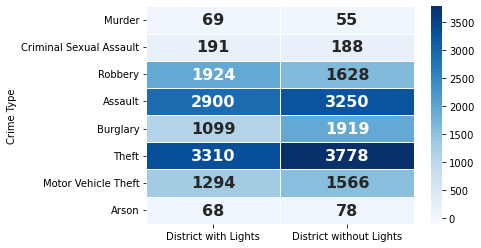

In [173]:
sns.heatmap(Light, cmap='Blues', vmin=-100, annot=True, fmt=".0f", annot_kws={'fontsize':16, 'fontweight':'bold'}, linewidth=0.5, xticklabels=['District with Lights', 'District without Lights'])
plt.show()

<br>

#### It is observed that in the Murder, the SA, and Assault are slightly more in the District with Light, While the difference between the two districts in the other crimes is well noticable as the difference between each of the crimes is pretty large that it sometimes reaches around 900!

#### With that information we can find that the total number of crimes is Larger in the District with no lights while some crimes like the assault does not really get affected by the lights.

<br><br>

<br>

### Part Two: Question Two. Question 8 (Made by Abdelrahman, Adam, Mohamed)

#### Does the days with high COVID-19 cases have an impact on the crime rate?
<br><br>

In [184]:
CovidMerged['cases_total1'] = CovidMerged['cases_total'].div(10)

In [185]:
CovidMerged

,Dates,cases_total,deaths_total,hospitalizations_total,Primary Type,cases_total1
0,2022-01-26,1232,23,59,473,123.2
1,2022-01-25,1371,19,71,478,137.1
2,2022-01-24,1522,19,83,441,152.2
3,2022-01-23,675,26,62,430,67.5
4,2022-01-22,997,20,79,518,99.7
...,...,...,...,...,...,...
95,2021-10-23,222,2,19,629,22.2
96,2021-10-22,306,5,17,587,30.6
97,2021-10-21,337,5,23,613,33.7
98,2021-10-20,324,5,13,588,32.4


### Line plot that represents the total number of COVID-19 cases and the total number of crime in the day

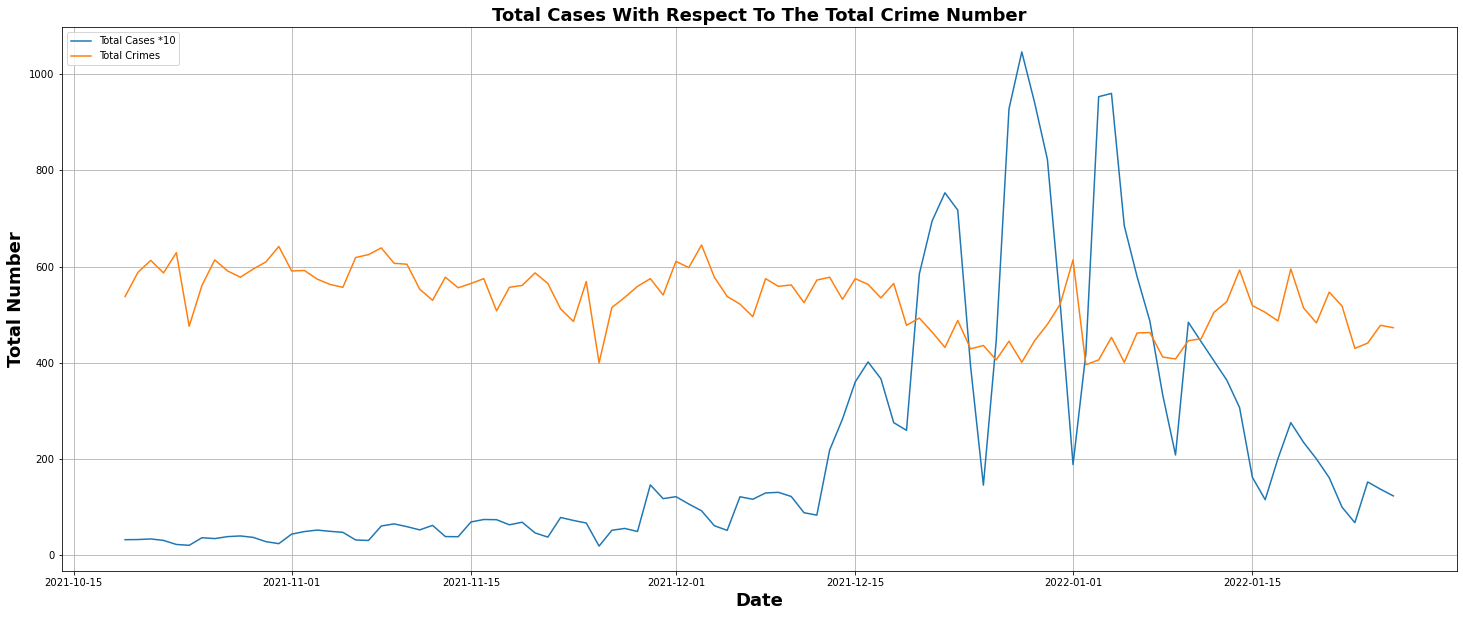

In [188]:
rcParams['figure.figsize']=25, 10

plt.title('Total Cases With Respect To The Total Crime Number', fontdict={'fontweight':'bold', 'fontsize':18})

plt.plot(CovidMerged.Dates, CovidMerged['cases_total1'], label='Total Cases *10')
plt.plot(CovidMerged.Dates, CovidMerged['Primary Type'], label='Total Crimes')

plt.grid(True)

plt.xlabel('Date', fontdict={'fontweight':'bold', 'fontsize':18})
plt.ylabel('Total Number', fontdict={'fontweight':'bold', 'fontsize':18})

plt.legend(loc=2);

<br>

#### Most of the time COVID-19 does not have any effect on the crime rate, although on some days where COVID-19 peaks in numbers crime rate gets relatively low, and when COVID-19 gets extra low in number there are some occasions where the crime rate does get larger. But most of the time they have no relation.

<br><br>

<br>

### Part Two: Question Three, Question 6 (Made by Abdelrahman, Adam, Mohamed)

#### Is there a relation between the average income in Chicago and the crime rate?
<br><br>

In [190]:
EcoMerge['Crime Rate1'] = EcoMerge['Crime Rate'].div(10)

In [201]:
EcoMerge.dtypes

Year             int64
Illinois       float64
Chicago        float64
Population     float64
Crime Rate     float64
Crime Rate1    float64
dtype: object

In [202]:
EcoMergeFinal=EcoMerge.loc[:, ['Year', 'Chicago', 'Crime Rate1']]
EcoMergeFinal

,Year,Chicago,Crime Rate1
6,2013,66.576,99.103333
7,2012,66.109,104.155000
8,2011,65.238,105.388333
9,2010,67.103,107.155000
10,2009,70.151,110.886667
11,2008,72.961,116.595000
12,2007,73.242,118.253333
13,2006,72.463,120.236667
14,2005,71.795,122.446667


In [203]:
EcoMergeFinal = EcoMergeFinal.set_index('Year')

### Multiple bar plot that represents the average income and the crime rate in chicago

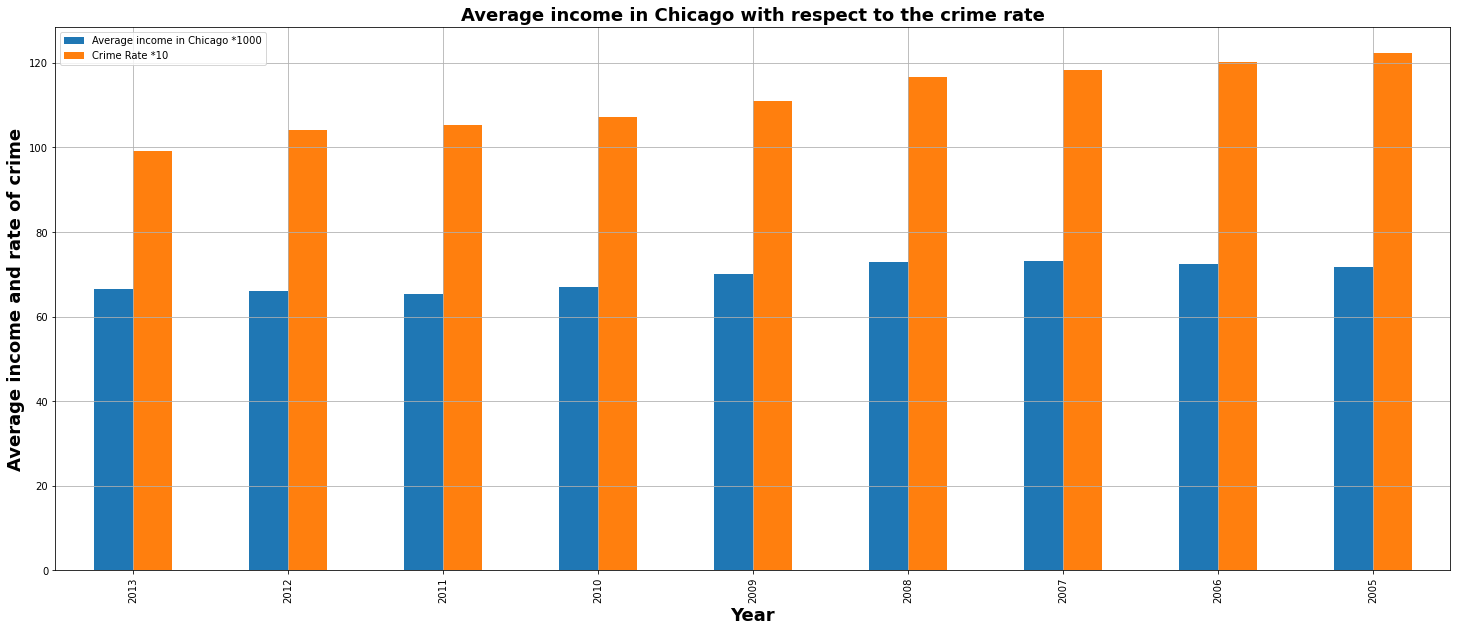

In [215]:
EcoMergeFinal.plot.bar()
plt.title("Average income in Chicago with respect to the crime rate", fontdict={'fontweight':'bold', 'fontsize':18})
plt.legend(["Average income in Chicago *1000", "Crime Rate *10"]);
plt.xlabel('Year', fontdict={'fontweight':'bold', 'fontsize':18})
plt.ylabel('Average income and rate of crime', fontdict={'fontweight':'bold', 'fontsize':18})

plt.grid(True)

<br>

### From the graph we can find that the crime rate is constantly rising, while the average income declined at first and then increased but declined again at the end. There is no correlation between both of the average income, and the crime rates.

<br><br>

<br>

## Hypothesis Testing

<br><br>

### We read the dataframe from the above questions.

In [145]:
dfCrimeClean.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,HY411435,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)"


#### We only pick the Community Area and the Arrest to the new dataframe, because we will only use these two

In [150]:
dfHypo=dfCrimeClean.loc[:, ['Community Area', 'Arrest']]

In [151]:
dfHypo['Community Area'].unique()

array([61., 25., 21., 71., 24., 31., 27., 65., 11., 49., 39., 51., 15.,
       52., 12., 43., 46., 32., 68., 14., 29.,  2., 69., 23., 35.,  8.,
        3.,  6., 44., 28., 53., 50., 33., 13., 74., 19., 72., 22., 64.,
        7.,  5., 26., 66., 59., 77.,  1., 10., 67., 38., 41., 60., 30.,
       54., 58., 48., 73., 70., 63., 40., 34., 16., 18.,  4., 17., 42.,
       56., 37., 75., 62., 20., 76., 45., 47.,  9., 36., 57., 55.,  0.])

In [152]:
dfHypo['Arrest'].unique()

array([False,  True])

#### We collect the observed frequency data

We will store the rows and columns for easier recalling

In [154]:
rows=dfHypo['Community Area'].unique()
cols=dfHypo['Arrest'].unique()

##### We count the values

In [155]:
matrix=[]
for i in rows:
    l=[]
    for j in cols:
        l.append(len(dfHypo[(dfHypo['Community Area']==i) & (dfHypo['Arrest']==j)]))
    matrix.append(l)
matrix

[[93021, 45716],
 [265419, 164728],
 [50626, 12712],
 [143732, 50538],
 [162958, 36321],
 [48691, 17813],
 [78326, 50169],
 [39005, 11393],
 [22635, 4488],
 [133401, 48662],
 [32005, 6884],
 [34787, 10005],
 [67142, 19262],
 [26772, 7005],
 [11109, 1345],
 [172581, 52381],
 [93938, 32317],
 [124718, 41649],
 [129466, 50523],
 [46856, 14145],
 [124655, 74563],
 [72011, 14374],
 [124961, 45006],
 [133048, 81671],
 [48647, 27108],
 [175779, 61704],
 [69131, 30143],
 [110777, 25358],
 [111191, 38506],
 [152463, 50979],
 [84476, 27859],
 [21212, 6417],
 [35462, 16381],
 [18847, 3991],
 [12913, 2422],
 [95249, 29979],
 [21438, 3261],
 [113180, 28396],
 [22660, 4328],
 [91388, 14503],
 [32746, 7451],
 [72500, 56952],
 [122552, 45187],
 [21210, 6653],
 [52754, 14864],
 [76700, 28061],
 [25160, 4238],
 [140187, 57873],
 [68587, 25772],
 [36716, 6373],
 [35290, 8258],
 [82818, 32200],
 [23605, 7078],
 [49374, 16691],
 [30613, 6663],
 [62861, 18300],
 [52068, 9938],
 [46409, 16043],
 [52213, 2037

In [156]:
pd.DataFrame(matrix,index=rows,columns=cols)

,False,True
61.0,93021,45716
25.0,265419,164728
21.0,50626,12712
71.0,143732,50538
24.0,162958,36321
...,...,...
9.0,5905,777
36.0,12452,2874
57.0,19806,4605
55.0,12326,2677


#### Create a dataframe

In [157]:
observedValues=pd.DataFrame(matrix,index=rows,columns=cols)

In [158]:
observedValues.sum()

False    5017564
True     1802775
dtype: int64

#### Add a row that counts the sum of the first and second columns

In [159]:
observedValues.loc['Total']=observedValues.sum()

In [160]:
observedValues

,False,True
61.0,93021,45716
25.0,265419,164728
21.0,50626,12712
71.0,143732,50538
24.0,162958,36321
...,...,...
36.0,12452,2874
57.0,19806,4605
55.0,12326,2677
0.0,60,7


#### Add a column that counts the sum of the sum of the rows

In [161]:
observedValues['Total']=observedValues.sum(axis=1)

In [162]:
observedValues

,False,True,Total
61.0,93021,45716,138737
25.0,265419,164728,430147
21.0,50626,12712,63338
71.0,143732,50538,194270
24.0,162958,36321,199279
...,...,...,...
36.0,12452,2874,15326
57.0,19806,4605,24411
55.0,12326,2677,15003
0.0,60,7,67


###  Calculating the expected frequency data

#### We create a dataframe that contains the expected frequency

In [163]:
matrix=[]
for i in rows:
    l=[]
    for j in cols:
        print(observedValues.loc[i,'Total'])
        print(observedValues.loc['Total',j])
        print(observedValues.loc['Total','Total'])
        break
    break

138737
5017564
6820339


In [164]:
matrix=[]
for i in rows:
    l=[]
    for j in cols:
        v=(observedValues.loc[i,'Total']*observedValues.loc['Total',j])/observedValues.loc['Total','Total']
        l.append(v)
    matrix.append(l)
matrix

[[102065.56839300803, 36671.431606991966],
 [316449.0946722736, 113697.90532772637],
 [46596.28628899531, 16741.713711004686],
 [142919.89859741577, 51350.10140258424],
 [146604.9028290236, 52674.0971709764],
 [48925.438494479524, 17578.561505520473],
 [94530.76836503288, 33964.23163496712],
 [37076.630717622684, 13321.369282377313],
 [19953.7571918346, 7169.242808165401],
 [133939.49399465334, 48123.50600534666],
 [28609.72840147682, 10279.271598523183],
 [32952.42753886573, 11839.572461134263],
 [63565.403399449795, 22838.59660055021],
 [24848.949477144757, 8928.050522855243],
 [9162.11672997486, 3291.883270025141],
 [165499.28567597593, 59462.71432402407],
 [92882.85271743823, 33372.14728256176],
 [122392.3136354366, 43974.6863645634],
 [132413.7006673715, 47575.29933262848],
 [44877.01000844679, 16123.989991553206],
 [146560.02655469178, 52657.97344530822],
 [63551.42554351038, 22833.574456489627],
 [125040.74949764227, 44926.250502357725],
 [157963.7499713724, 56755.25002862761],


In [165]:
expectedF=pd.DataFrame(matrix,index=rows,columns=cols)
expectedF

,False,True
61.0,102065.568393,36671.431607
25.0,316449.094672,113697.905328
21.0,46596.286289,16741.713711
71.0,142919.898597,51350.101403
24.0,146604.902829,52674.097171
...,...,...
9.0,4915.791231,1766.208769
36.0,11274.980007,4051.019993
57.0,17958.602176,6452.397824
55.0,11037.356456,3965.643544


In [166]:
observedValues.drop('Total',axis=1,inplace=True)
observedValues.drop('Total',axis=0,inplace=True)

In [167]:
observedValues

,False,True
61.0,93021,45716
25.0,265419,164728
21.0,50626,12712
71.0,143732,50538
24.0,162958,36321
...,...,...
9.0,5905,777
36.0,12452,2874
57.0,19806,4605
55.0,12326,2677


In [168]:
expectedF.shape

(78, 2)

### This is the degree of freedom

In [169]:
freeDom=(expectedF.shape[0]-1)*(expectedF.shape[1]-1)
freeDom

77

### Now we caluclate the chi square

In [170]:
observedValues.values.flatten()

array([ 93021,  45716, 265419, 164728,  50626,  12712, 143732,  50538,
       162958,  36321,  48691,  17813,  78326,  50169,  39005,  11393,
        22635,   4488, 133401,  48662,  32005,   6884,  34787,  10005,
        67142,  19262,  26772,   7005,  11109,   1345, 172581,  52381,
        93938,  32317, 124718,  41649, 129466,  50523,  46856,  14145,
       124655,  74563,  72011,  14374, 124961,  45006, 133048,  81671,
        48647,  27108, 175779,  61704,  69131,  30143, 110777,  25358,
       111191,  38506, 152463,  50979,  84476,  27859,  21212,   6417,
        35462,  16381,  18847,   3991,  12913,   2422,  95249,  29979,
        21438,   3261, 113180,  28396,  22660,   4328,  91388,  14503,
        32746,   7451,  72500,  56952, 122552,  45187,  21210,   6653,
        52754,  14864,  76700,  28061,  25160,   4238, 140187,  57873,
        68587,  25772,  36716,   6373,  35290,   8258,  82818,  32200,
        23605,   7078,  49374,  16691,  30613,   6663,  62861,  18300,
      

#### Add theObserved Values to the new dataframe to recreate chi square

In [171]:
chiScoreTable=pd.DataFrame(observedValues.values.flatten(),columns=['O'])
chiScoreTable

,O
0,93021
1,45716
2,265419
3,164728
4,50626
...,...
151,4605
152,12326
153,2677
154,60


#### Add The Expected values

In [172]:
chiScoreTable['E']=expectedF.values.flatten()
chiScoreTable

,O,E
0,93021,102065.568393
1,45716,36671.431607
2,265419,316449.094672
3,164728,113697.905328
4,50626,46596.286289
...,...,...
151,4605,6452.397824
152,12326,11037.356456
153,2677,3965.643544
154,60,49.290334


#### Calculate the Observed - Expected Values

In [173]:
chiScoreTable['O-E']=chiScoreTable['O']-chiScoreTable['E']
chiScoreTable

,O,E,O-E
0,93021,102065.568393,-9044.568393
1,45716,36671.431607,9044.568393
2,265419,316449.094672,-51030.094672
3,164728,113697.905328,51030.094672
4,50626,46596.286289,4029.713711
...,...,...,...
151,4605,6452.397824,-1847.397824
152,12326,11037.356456,1288.643544
153,2677,3965.643544,-1288.643544
154,60,49.290334,10.709666


#### Calculate (O-E)^2

In [174]:
chiScoreTable['(O-E)^2']=chiScoreTable['O-E']**2
chiScoreTable

,O,E,O-E,(O-E)^2
0,93021,102065.568393,-9044.568393,8.180422e+07
1,45716,36671.431607,9044.568393,8.180422e+07
2,265419,316449.094672,-51030.094672,2.604071e+09
3,164728,113697.905328,51030.094672,2.604071e+09
4,50626,46596.286289,4029.713711,1.623859e+07
...,...,...,...,...
151,4605,6452.397824,-1847.397824,3.412879e+06
152,12326,11037.356456,1288.643544,1.660602e+06
153,2677,3965.643544,-1288.643544,1.660602e+06
154,60,49.290334,10.709666,1.146969e+02


#### Calculate ((O-E)^2)/E, which is the last step in calculating the chi score

In [175]:
chiScoreTable['((O-E)^2)\E']=chiScoreTable['(O-E)^2']/chiScoreTable['E']
chiScoreTable

,O,E,O-E,(O-E)^2,((O-E)^2)\E
0,93021,102065.568393,-9044.568393,8.180422e+07,801.486914
1,45716,36671.431607,9044.568393,8.180422e+07,2230.734221
2,265419,316449.094672,-51030.094672,2.604071e+09,8229.034641
3,164728,113697.905328,51030.094672,2.604071e+09,22903.417216
4,50626,46596.286289,4029.713711,1.623859e+07,348.495425
...,...,...,...,...,...
151,4605,6452.397824,-1847.397824,3.412879e+06,528.931851
152,12326,11037.356456,1288.643544,1.660602e+06,150.452891
153,2677,3965.643544,-1288.643544,1.660602e+06,418.747214
154,60,49.290334,10.709666,1.146969e+02,2.326966


### Now we calculate the sum of ((O-E)^2)/E which is the chi score

In [176]:
chiScore=chiScoreTable['((O-E)^2)\E'].sum()
chiScore

171214.50602373615

### The Freedom Degree is 77 and the p-value is 0.90

[The Critical Values of the Chi Square with degrees of freedom](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm)

In [177]:
TabularValue=93.270

In [178]:
TabularValue,chiScore

(93.27, 171214.50602373615)

#### Since the chi square statistic exceeds table value (based upon a p-value of x and n degrees of freedom) the null hypothesis should is rejected.